# 1-LIBRARIES,CONNECTING AND READING DATAFRAME

## Import libraries



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
import re
import statsmodels.api as sm
from statsmodels.formula.api import ols





import warnings
warnings.filterwarnings('ignore')

## Connecting data

In [7]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')

## Understanding Data

In [8]:
df.head(5)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [9]:
df.tail(5)

car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
203       3.01    3.40             23.0        106     4800      26   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[5 rows x 26 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
df.shape

(205, 26)

In [12]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [13]:
df.isnull().sum().sort_values(ascending=False)

car_ID              0
symboling           0
highwaympg          0
citympg             0
peakrpm             0
horsepower          0
compressionratio    0
stroke              0
boreratio           0
fuelsystem          0
enginesize          0
cylindernumber      0
enginetype          0
curbweight          0
carheight           0
carwidth            0
carlength           0
wheelbase           0
enginelocation      0
drivewheel          0
carbody             0
doornumber          0
aspiration          0
fueltype            0
CarName             0
price               0
dtype: int64

In [14]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]

In [15]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [16]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [17]:
categorical_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
    'cylindernumber',
    'fuelsystem'
]

for col in categorical_columns:

    print(f"Category in {col} is : {df[col].unique()}")

Category in fueltype is : ['gas' 'diesel']
Category in aspiration is : ['std' 'turbo']
Category in doornumber is : ['two' 'four']
Category in carbody is : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Category in drivewheel is : ['rwd' 'fwd' '4wd']
Category in enginelocation is : ['front' 'rear']
Category in enginetype is : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Category in cylindernumber is : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Category in fuelsystem is : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


## Observations:
1. **Car Variety under Car_ID column :**
   - Dataset covers 205 car models, each unique in attributes.
   - Sizes, weights, and engine capacities vary across cars.

2. **Price Range under Price column:**
   - Mini Price $5,118
   
   - Maxi Price $45,400
   
   - Average car price is about $13,276.

3. **Engine Diversity :**
   - Engines differ in bore diameter (`boreratio`) and stroke length (`stroke`).
   - Risk ratings (`symboling`) vary from -2 to 3.

4. **Data Distribution :**
   - Features like `carwidth`, `curbweight`, `enginesize` show notable variability.
   - Potential outliers present in `compressionratio` and `horsepower`.


#2- DATA CLEANING

## Dealing with Datatypes

In [18]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

## Dealing with Special Keys

In [19]:
# Define the special characters pattern
special_characters = r'[!@#$%^&*()_+{}\[\]:;<>,.?~\\|"]'

def highlight_special_characters(val):
    if isinstance(val, str) and re.search(special_characters, val):
        return 'background-color: blue'
    return ''

styled_data = df.style.applymap(highlight_special_characters)
styled_data

## Dealing with Duplicated values

In [20]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

## Dealing with missing values

Text(0.5, 1.0, 'Missing nullu vales')

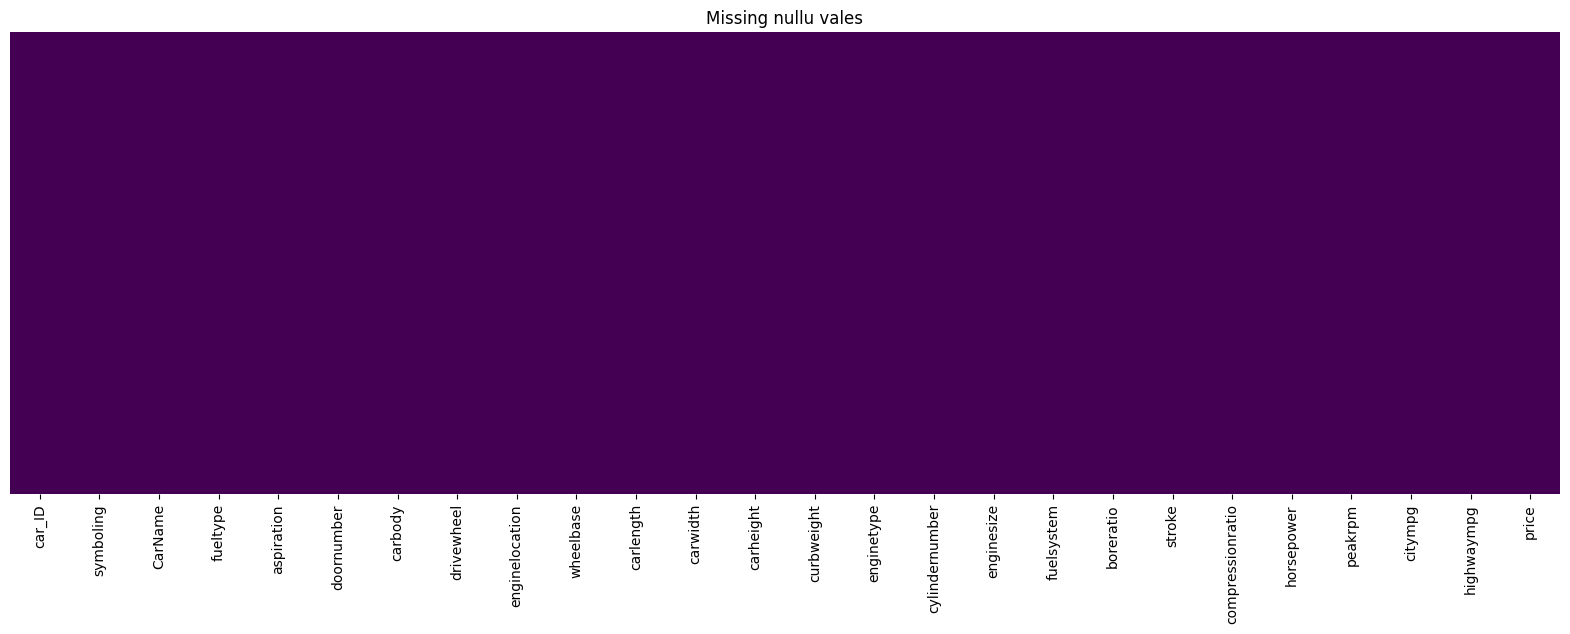

In [21]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing nullu vales")

## Observation:

**1) Dealing with Datatypes:**
No need to convert any datatypes

 **2) Dealing with Special keys:**
Found special values, but not affecting any issue for future analysis

**3) Dealing with Duplicated values:**
No duplicates were found

**4)Dealing with missing values:**
No missing value found

# 3-EXPLORATORY DATA ANALYSIS

## Statistics Summary

In [22]:
df.describe().T

count          mean          std      min      25%  \
car_ID            205.0    103.000000    59.322565     1.00    52.00   
symboling         205.0      0.834146     1.245307    -2.00     0.00   
wheelbase         205.0     98.756585     6.021776    86.60    94.50   
carlength         205.0    174.049268    12.337289   141.10   166.30   
carwidth          205.0     65.907805     2.145204    60.30    64.10   
carheight         205.0     53.724878     2.443522    47.80    52.00   
curbweight        205.0   2555.565854   520.680204  1488.00  2145.00   
enginesize        205.0    126.907317    41.642693    61.00    97.00   
boreratio         205.0      3.329756     0.270844     2.54     3.15   
stroke            205.0      3.255415     0.313597     2.07     3.11   
compressionratio  205.0     10.142537     3.972040     7.00     8.60   
horsepower        205.0    104.117073    39.544167    48.00    70.00   
peakrpm           205.0   5125.121951   476.985643  4150.00  4800.00   
citympg           205.0     25.219512     6.542142    13.00    19.00   
highwaympg        205.0     30.751220     6.886443    16.00    25.00   
price             205.0  13276.710571  7988.852332  5118.00  7788.00   

                       50%       75%       max  
car_ID              103.00    154.00    205.00  
symboling             1.00      2.00      3.00  
wheelbase            97.00    102.40    120.90  
carlength           173.20    183.10    208.10  
carwidth             65.50     66.90     72.30  
carheight            54.10     55.50     59.80  
curbweight         2414.00   2935.00   4066.00  
enginesize          120.00    141.00    326.00  
boreratio             3.31      3.58      3.94  
stroke                3.29      3.41      4.17  
compressionratio      9.00      9.40     23.00  
horsepower           95.00    116.00    288.00  
peakrpm            5200.00   5500.00   6600.00  
citympg              24.00     30.00     49.00  
highwaympg           30.00     34.00     54.00  
price             10295.00  16503.00  45400.00

In [23]:
df.describe(include='all').T

count unique            top freq          mean          std  \
car_ID            205.0    NaN            NaN  NaN         103.0    59.322565   
symboling         205.0    NaN            NaN  NaN      0.834146     1.245307   
CarName             205    147  toyota corona    6           NaN          NaN   
fueltype            205      2            gas  185           NaN          NaN   
aspiration          205      2            std  168           NaN          NaN   
doornumber          205      2           four  115           NaN          NaN   
carbody             205      5          sedan   96           NaN          NaN   
drivewheel          205      3            fwd  120           NaN          NaN   
enginelocation      205      2          front  202           NaN          NaN   
wheelbase         205.0    NaN            NaN  NaN     98.756585     6.021776   
carlength         205.0    NaN            NaN  NaN    174.049268    12.337289   
carwidth          205.0    NaN            NaN  NaN     65.907805     2.145204   
carheight         205.0    NaN            NaN  NaN     53.724878     2.443522   
curbweight        205.0    NaN            NaN  NaN   2555.565854   520.680204   
enginetype          205      7            ohc  148           NaN          NaN   
cylindernumber      205      7           four  159           NaN          NaN   
enginesize        205.0    NaN            NaN  NaN    126.907317    41.642693   
fuelsystem          205      8           mpfi   94           NaN          NaN   
boreratio         205.0    NaN            NaN  NaN      3.329756     0.270844   
stroke            205.0    NaN            NaN  NaN      3.255415     0.313597   
compressionratio  205.0    NaN            NaN  NaN     10.142537      3.97204   
horsepower        205.0    NaN            NaN  NaN    104.117073    39.544167   
peakrpm           205.0    NaN            NaN  NaN   5125.121951   476.985643   
citympg           205.0    NaN            NaN  NaN     25.219512     6.542142   
highwaympg        205.0    NaN            NaN  NaN      30.75122     6.886443   
price             205.0    NaN            NaN  NaN  13276.710571  7988.852332   

                     min     25%      50%      75%      max  
car_ID               1.0    52.0    103.0    154.0    205.0  
symboling           -2.0     0.0      1.0      2.0      3.0  
CarName              NaN     NaN      NaN      NaN      NaN  
fueltype             NaN     NaN      NaN      NaN      NaN  
aspiration           NaN     NaN      NaN      NaN      NaN  
doornumber           NaN     NaN      NaN      NaN      NaN  
carbody              NaN     NaN      NaN      NaN      NaN  
drivewheel           NaN     NaN      NaN      NaN      NaN  
enginelocation       NaN     NaN      NaN      NaN      NaN  
wheelbase           86.6    94.5     97.0    102.4    120.9  
carlength          141.1   166.3    173.2    183.1    208.1  
carwidth            60.3    64.1     65.5     66.9     72.3  
carheight           47.8    52.0     54.1     55.5     59.8  
curbweight        1488.0  2145.0   2414.0   2935.0   4066.0  
enginetype           NaN     NaN      NaN      NaN      NaN  
cylindernumber       NaN     NaN      NaN      NaN      NaN  
enginesize          61.0    97.0    120.0    141.0    326.0  
fuelsystem           NaN     NaN      NaN      NaN      NaN  
boreratio           2.54    3.15     3.31     3.58     3.94  
stroke              2.07    3.11     3.29     3.41     4.17  
compressionratio     7.0     8.6      9.0      9.4     23.0  
horsepower          48.0    70.0     95.0    116.0    288.0  
peakrpm           4150.0  4800.0   5200.0   5500.0   6600.0  
citympg             13.0    19.0     24.0     30.0     49.0  
highwaympg          16.0    25.0     30.0     34.0     54.0  
price             5118.0  7788.0  10295.0  16503.0  45400.0

In [24]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')
Numerical Variables:
['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


Observation:

## Univariate Analysis

NUMERIC VARIABLES

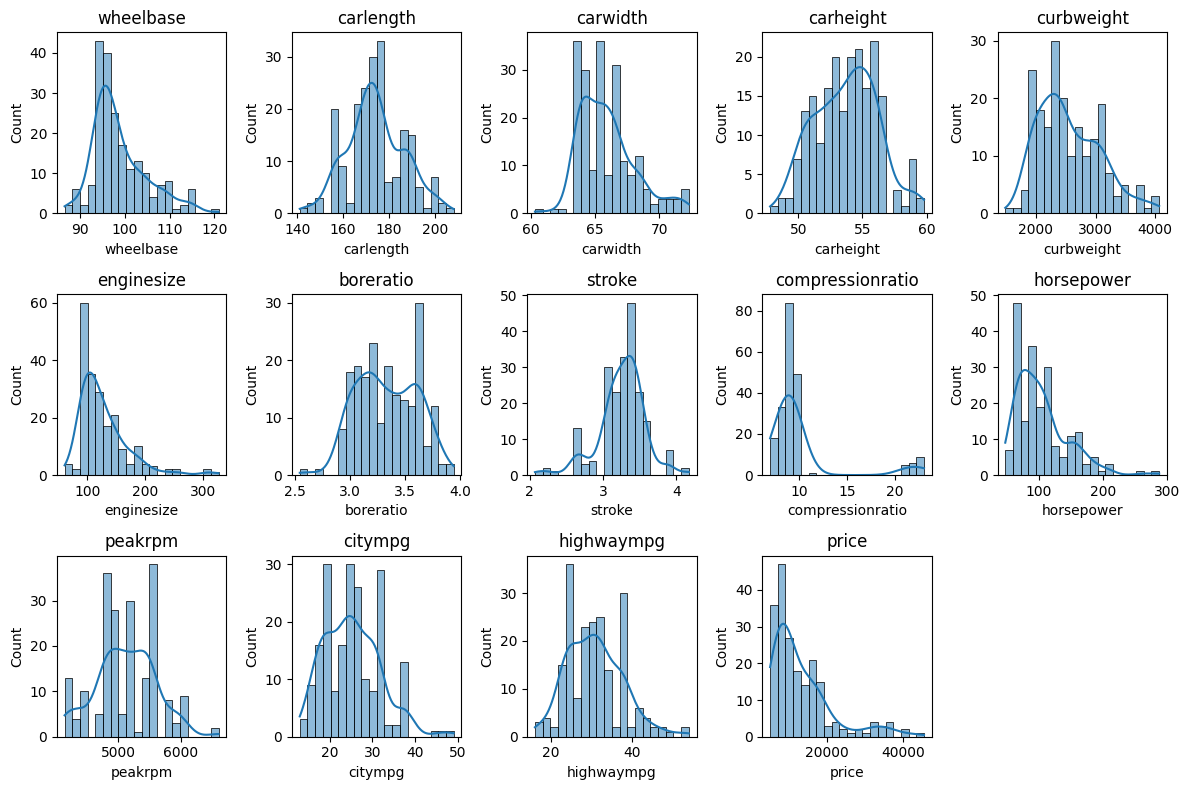

In [25]:
# Distribution of Numerical Features
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

car_ID
Skew : 0.0


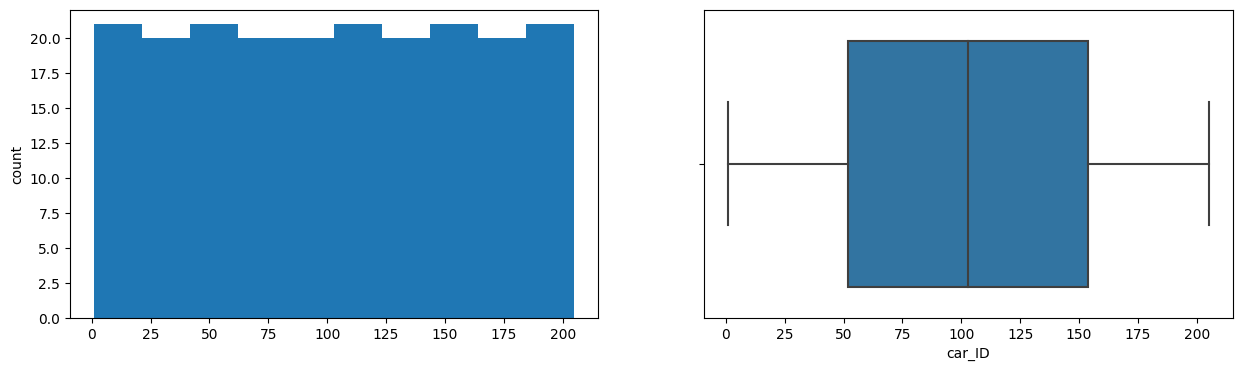

symboling
Skew : 0.21


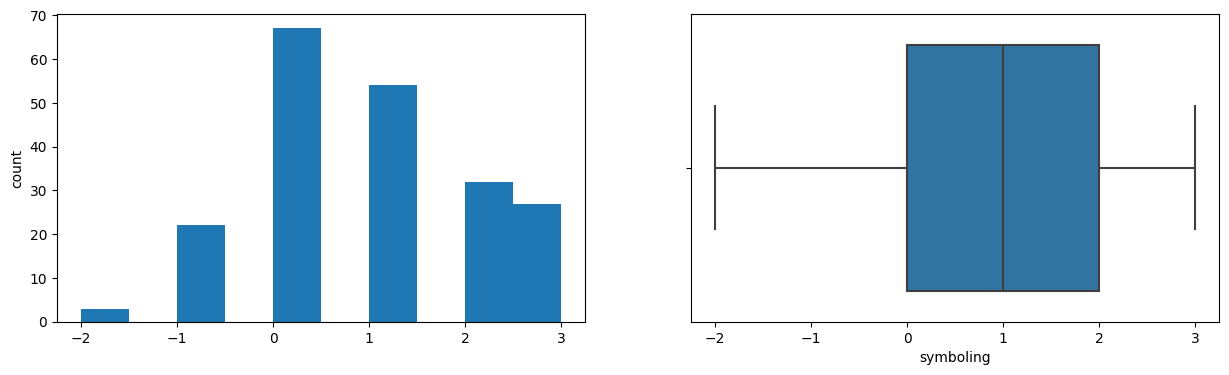

wheelbase
Skew : 1.05


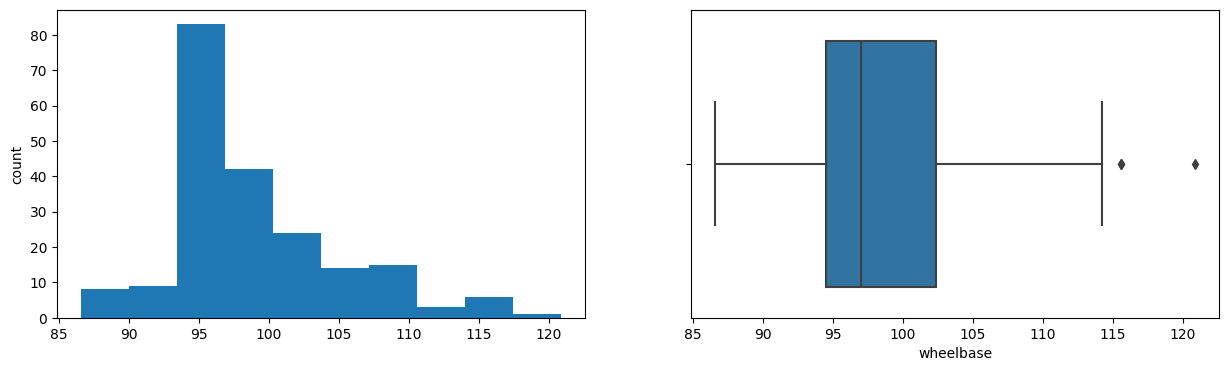

carlength
Skew : 0.16


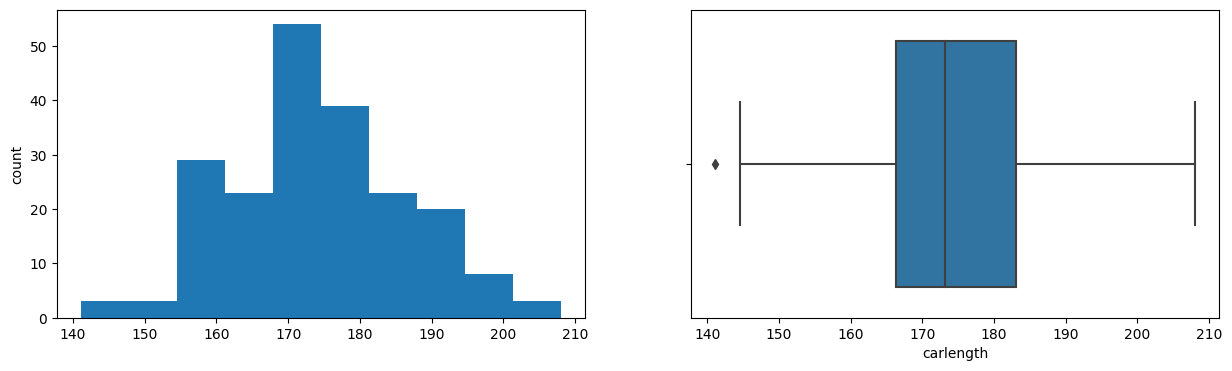

carwidth
Skew : 0.9


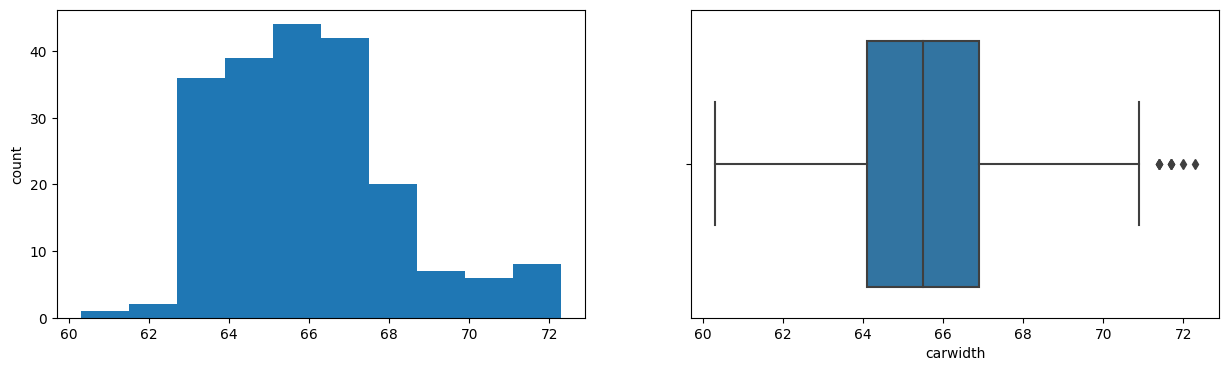

carheight
Skew : 0.06


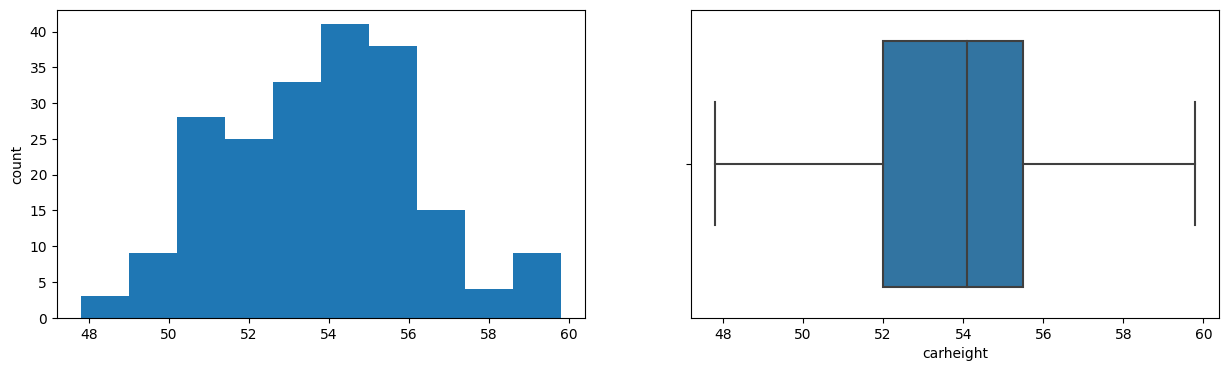

curbweight
Skew : 0.68


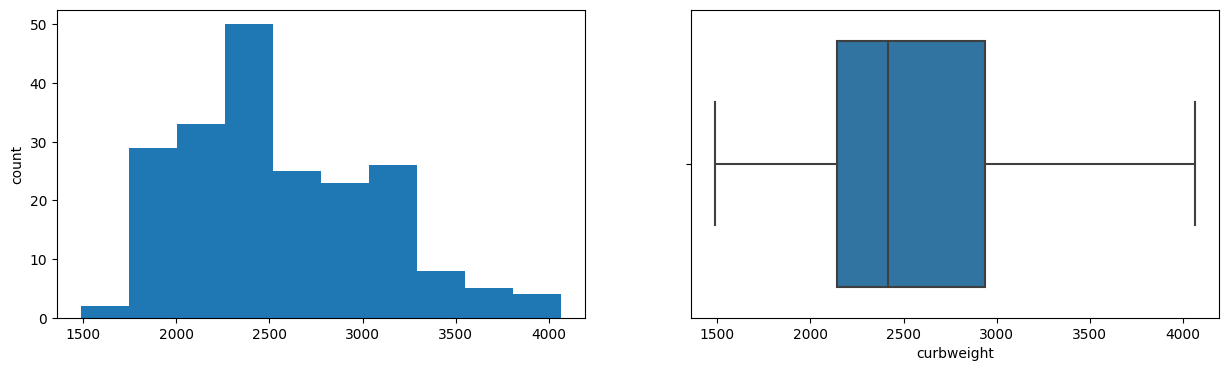

enginesize
Skew : 1.95


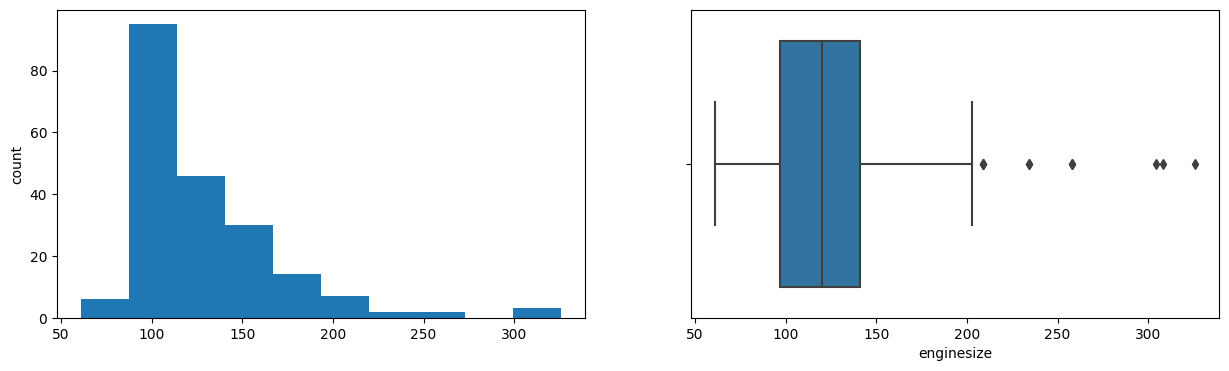

boreratio
Skew : 0.02


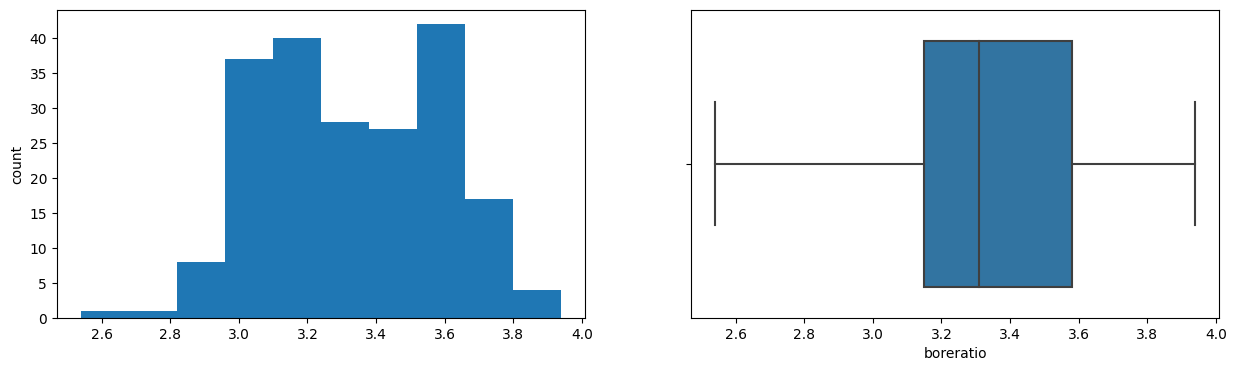

stroke
Skew : -0.69


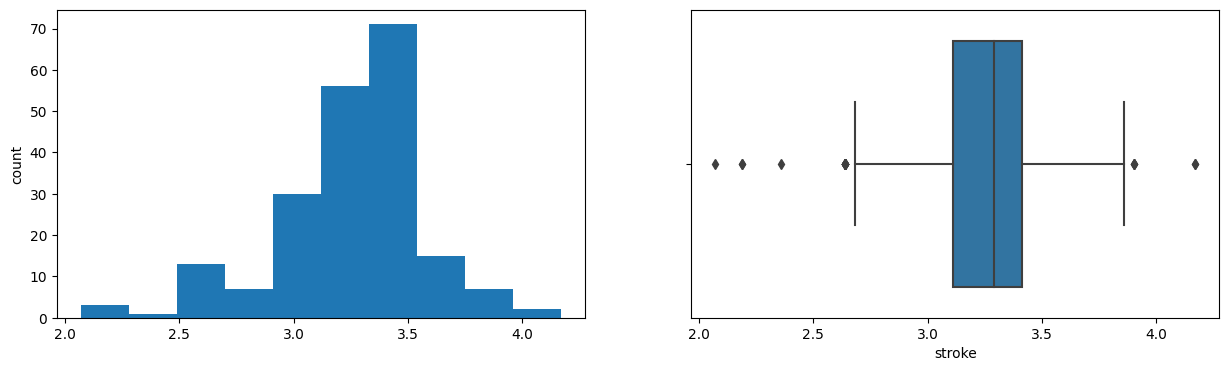

compressionratio
Skew : 2.61


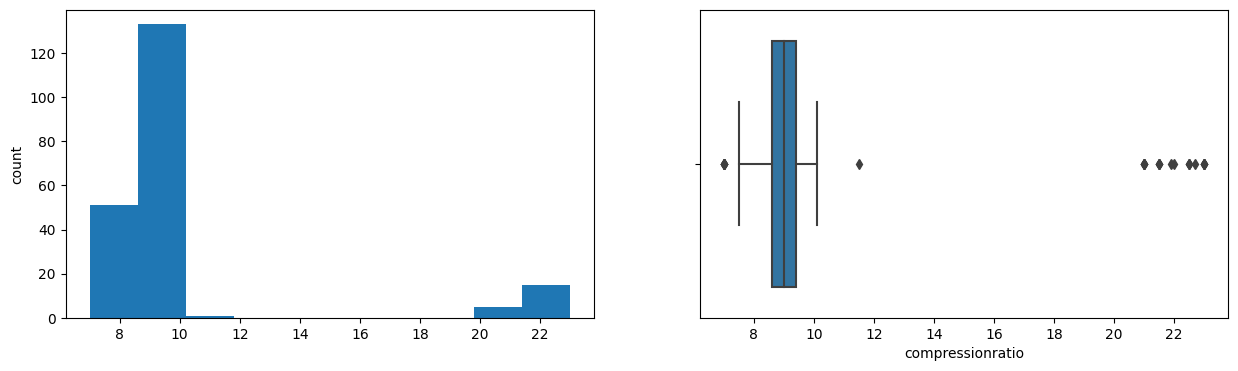

horsepower
Skew : 1.41


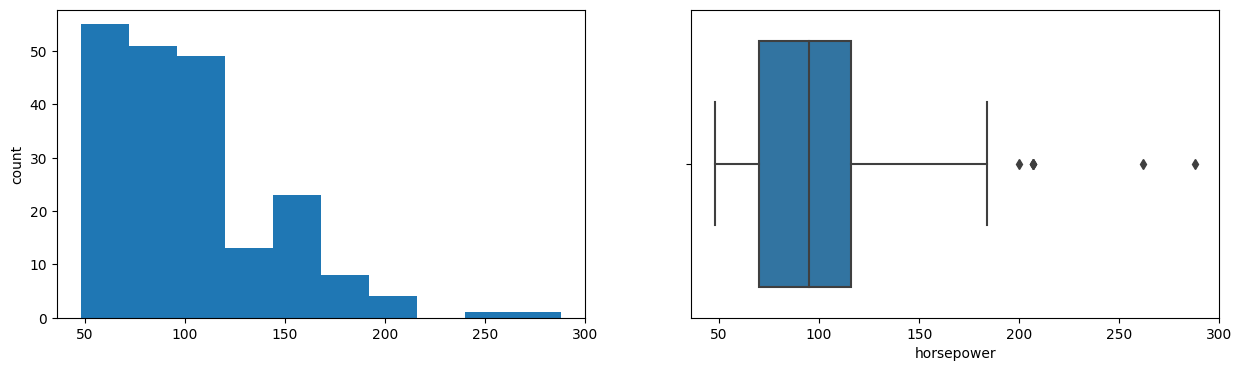

peakrpm
Skew : 0.08


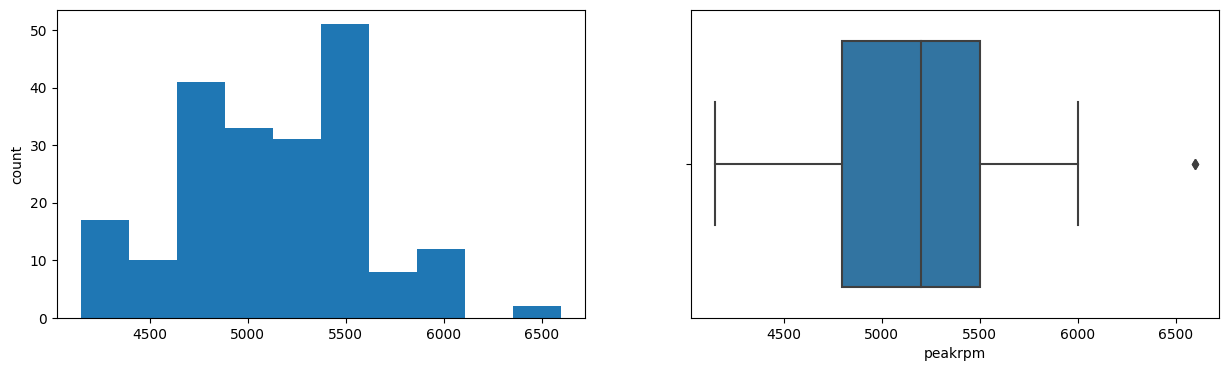

citympg
Skew : 0.66


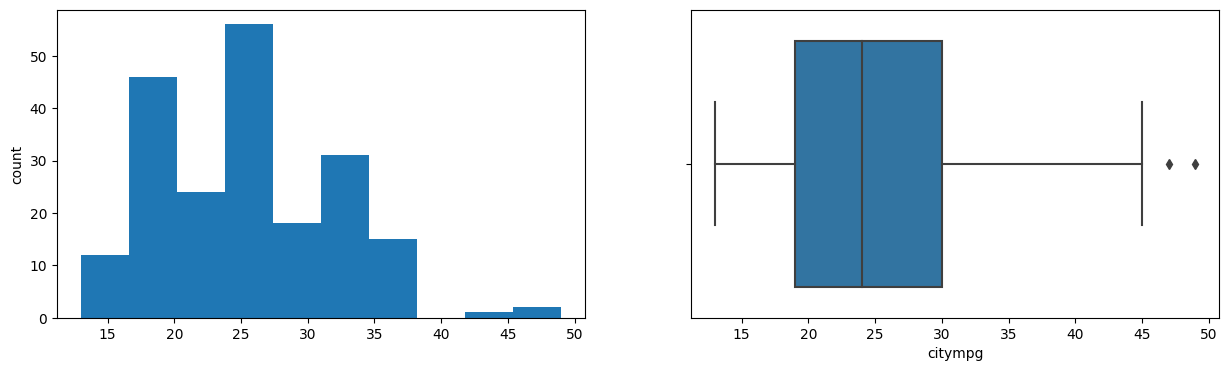

highwaympg
Skew : 0.54


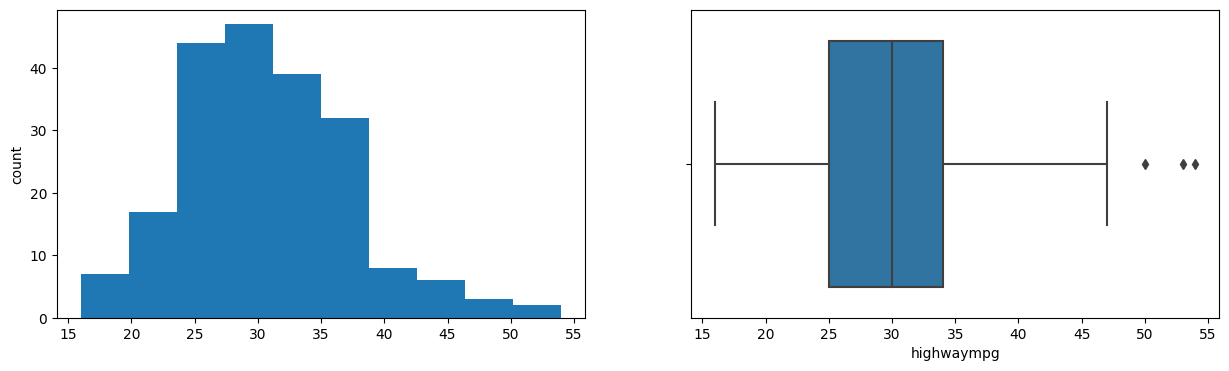

price
Skew : 1.78


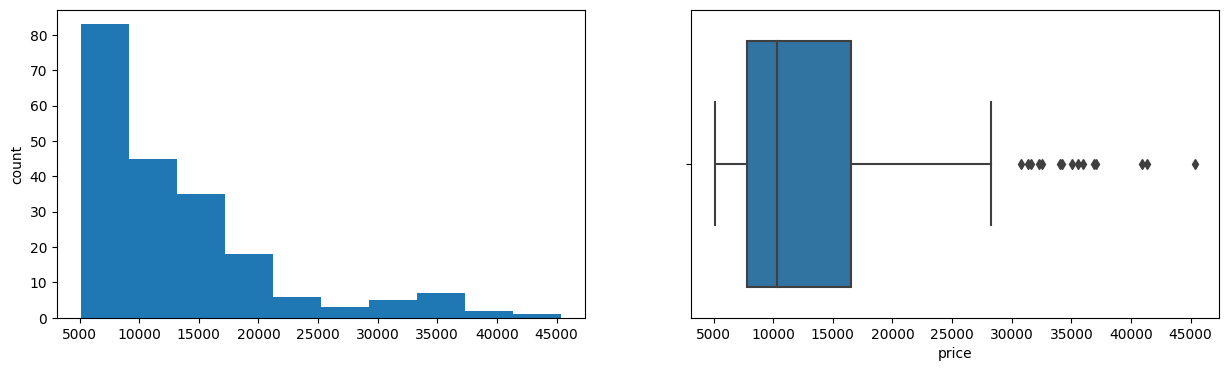

In [26]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

CATEGORICAL VARIABLES

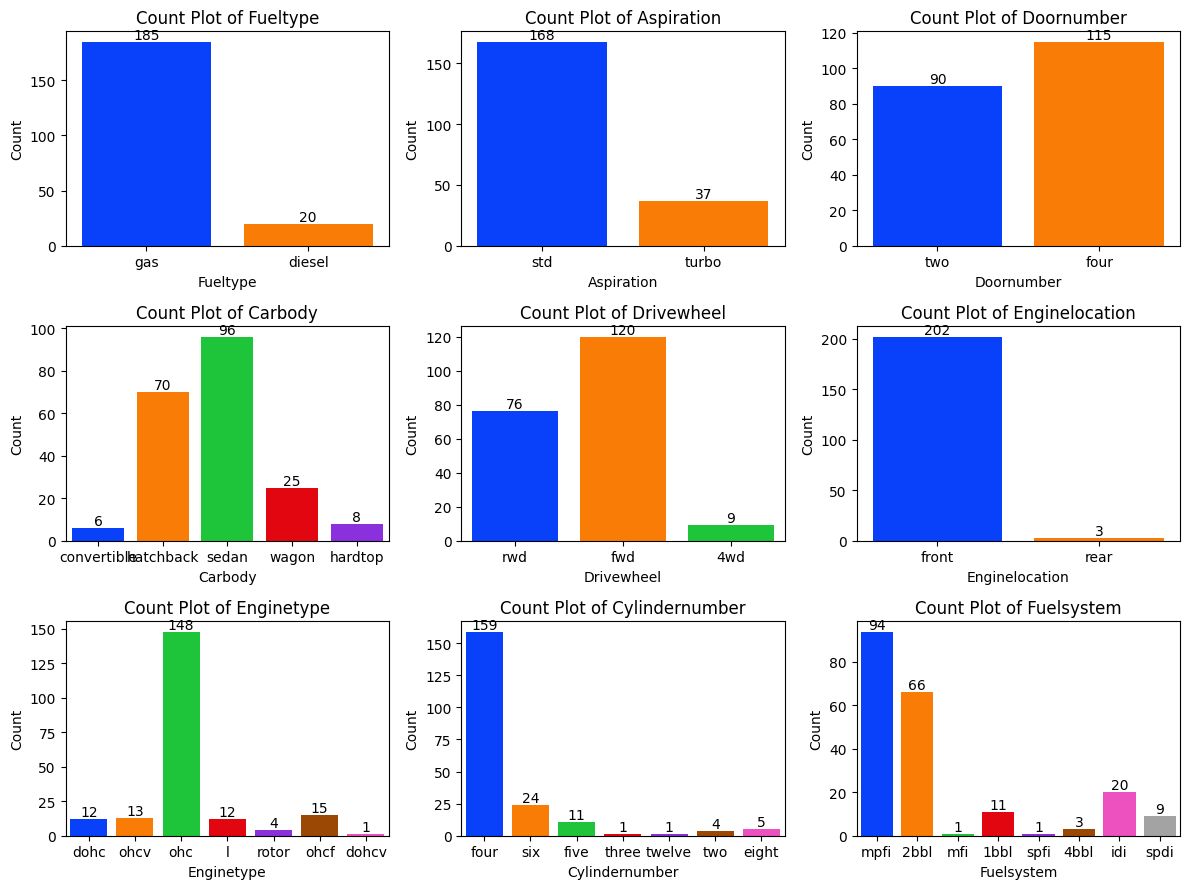

In [27]:
# Define the list of categorical columns to analyze
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## Observation:
Outliers found in numerical variables

## Data Transformation

### Finding outliers

For numeric values

In [28]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

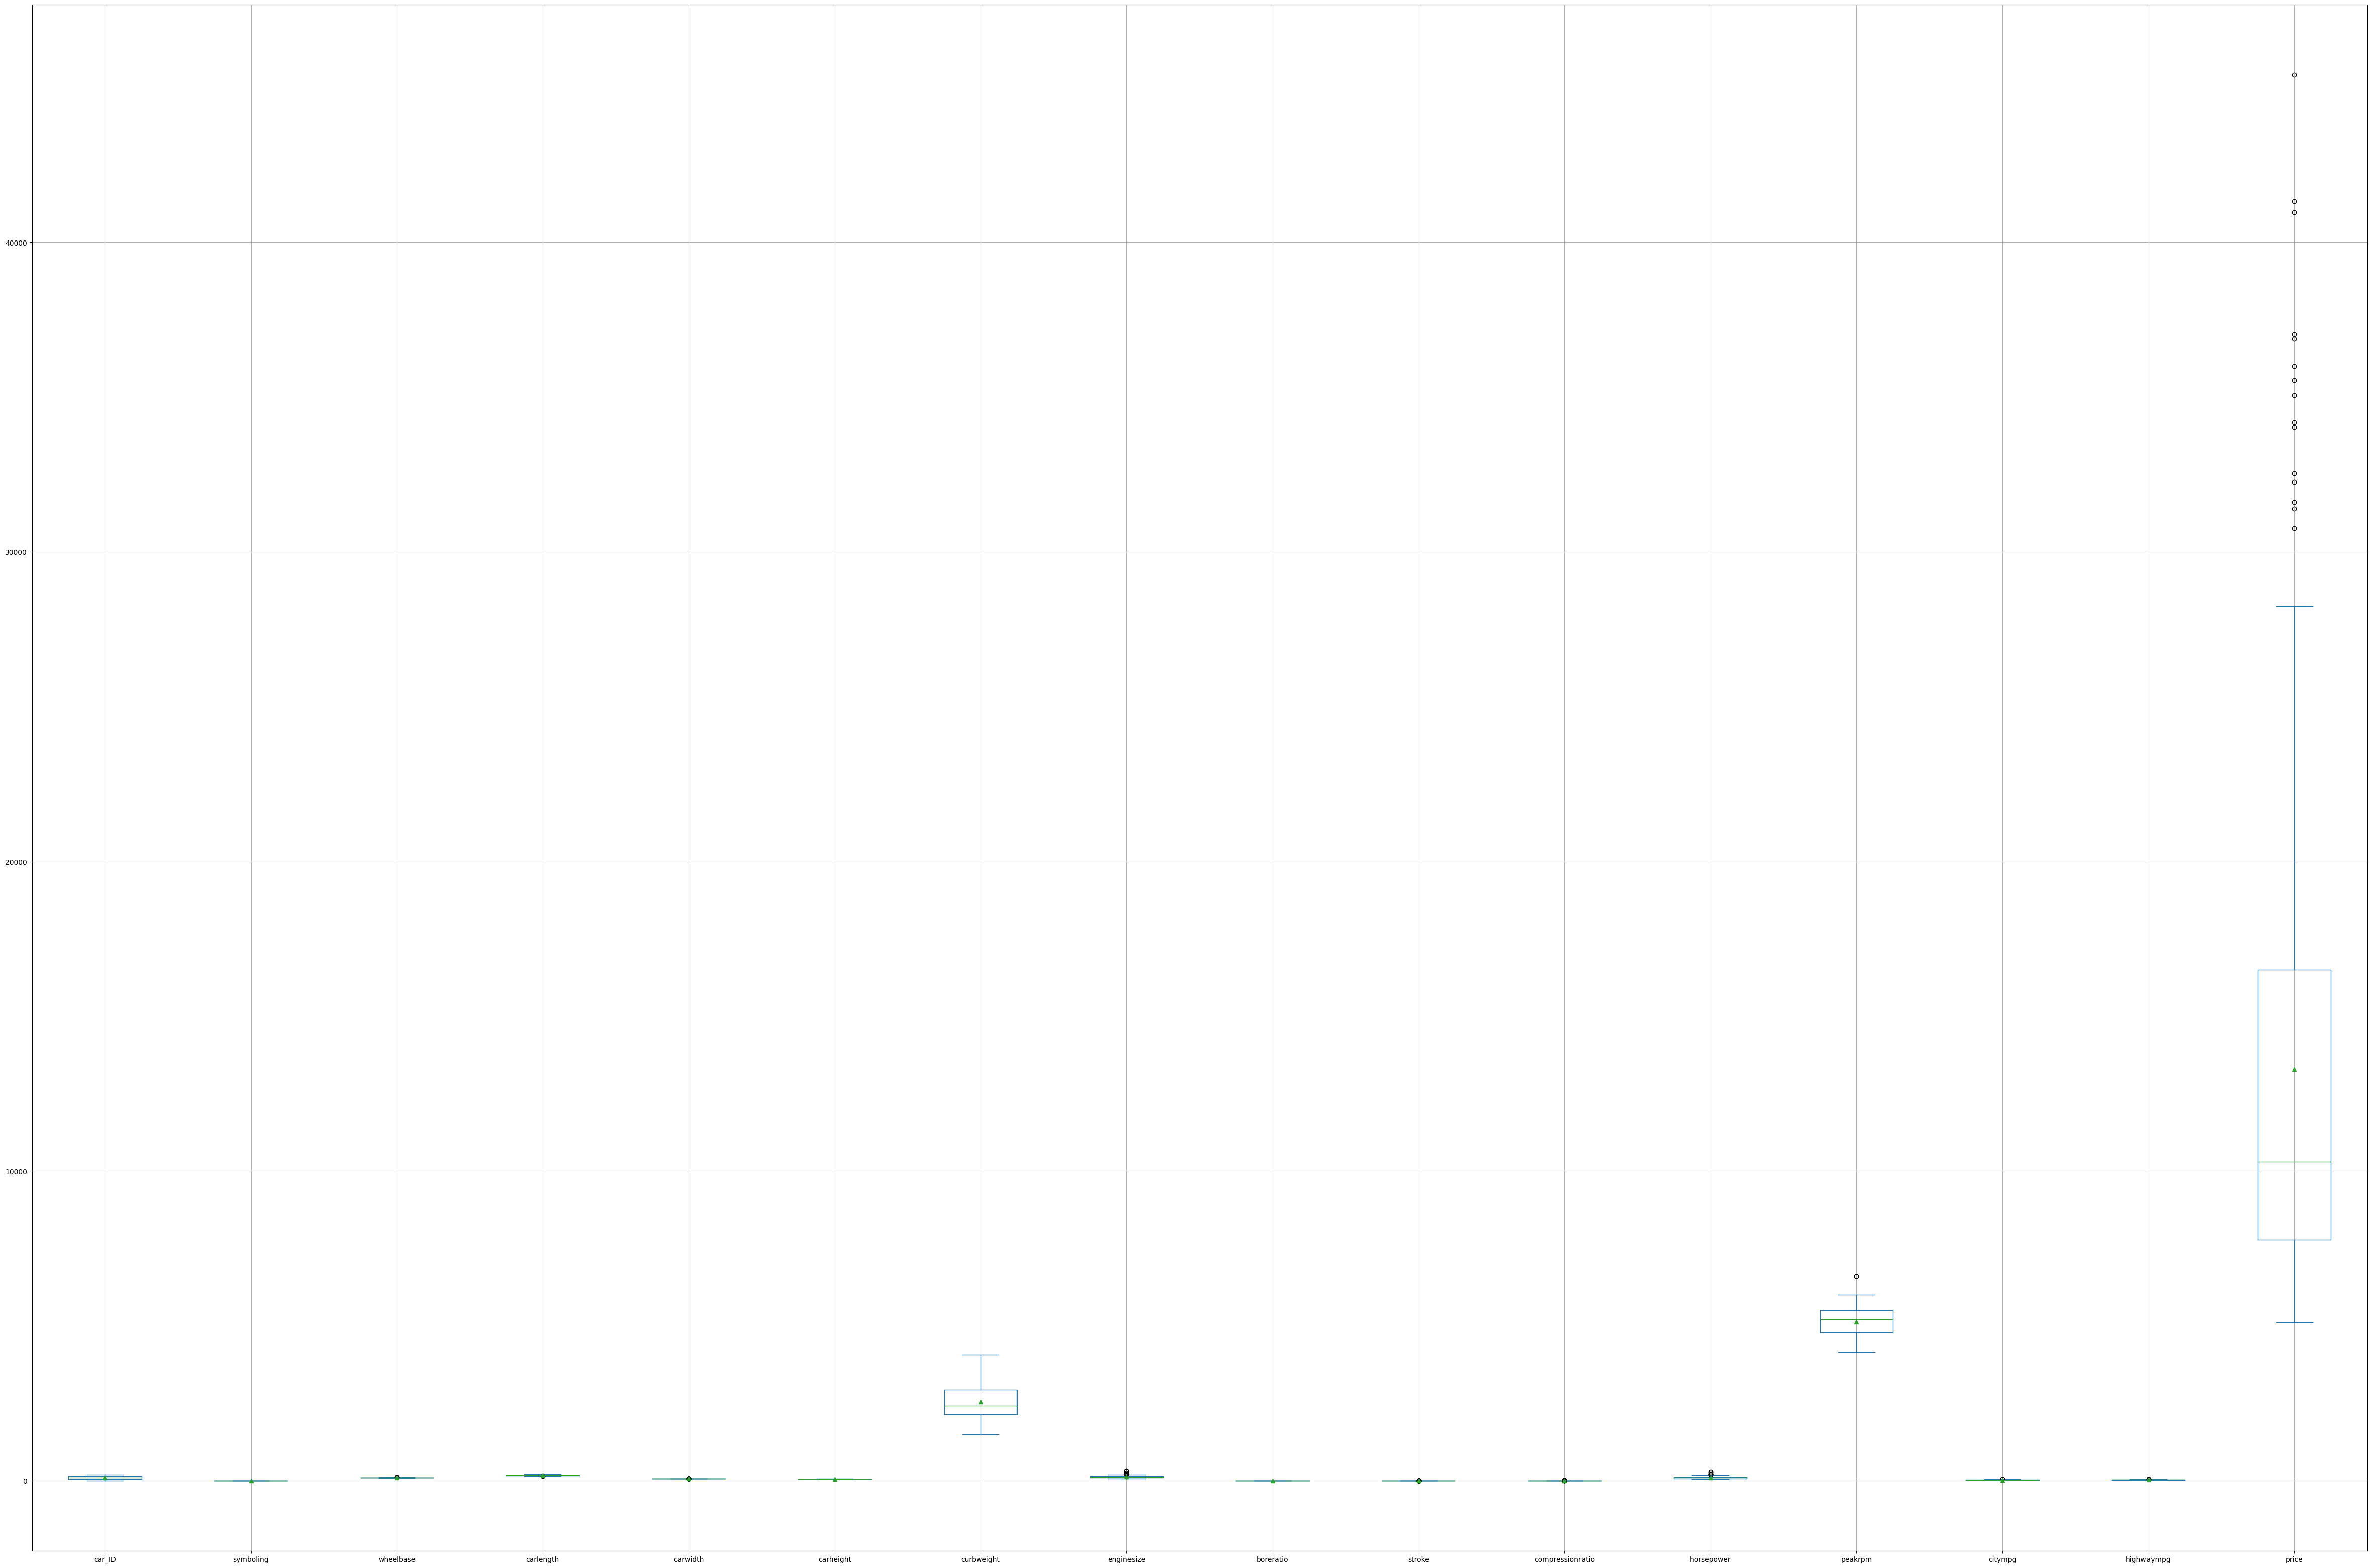

In [29]:
#detect with box pllot
ax=df.plot.box(figsize=(60,40), showmeans=True)
ax.grid()

### Handling Outliers

In [30]:
# Assuming you have a pandas DataFrame named df with the columns you mentioned
df1 = df.copy()  # Create a copy of the original DataFrame

columns_to_transform = ['wheelbase', 'carlength', 'carwidth', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# Define a function to perform the outlier transformation
def percentile_outlier_transformation(data, lower, upper):
    return np.where(data < lower, lower, np.where(data > upper, upper, data))

for column_name in columns_to_transform:
    column_data = df1[column_name]

    # Calculate the 25th and 75th percentiles
    q25 = np.percentile(column_data, 25)
    q75 = np.percentile(column_data, 75)

    # Calculate the IQR (Interquartile Range)
    iqr = q75 - q25

    # Define the lower and upper bounds for outliers
    lower_bound = q25 - 1.5 * iqr
    upper_bound = q75 + 1.5 * iqr

    # Transform outliers using the defined function and update df1
    df1[column_name] = percentile_outlier_transformation(column_data, lower_bound, upper_bound)


Showing box plot

wheelbase
Skew: 0.92


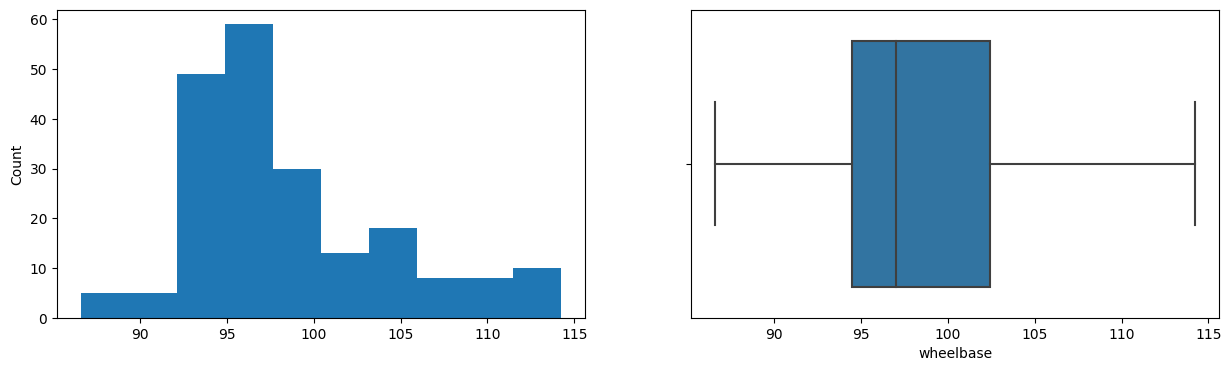

carlength
Skew: 0.16


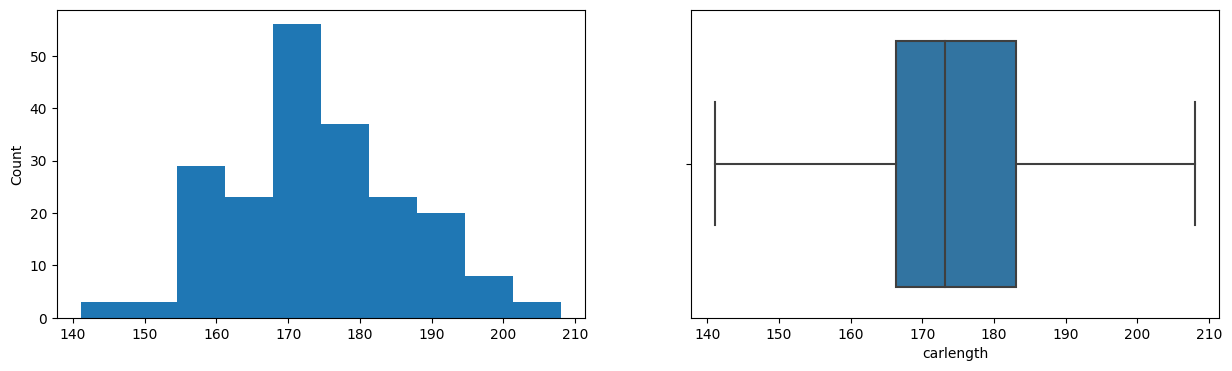

carwidth
Skew: 0.78


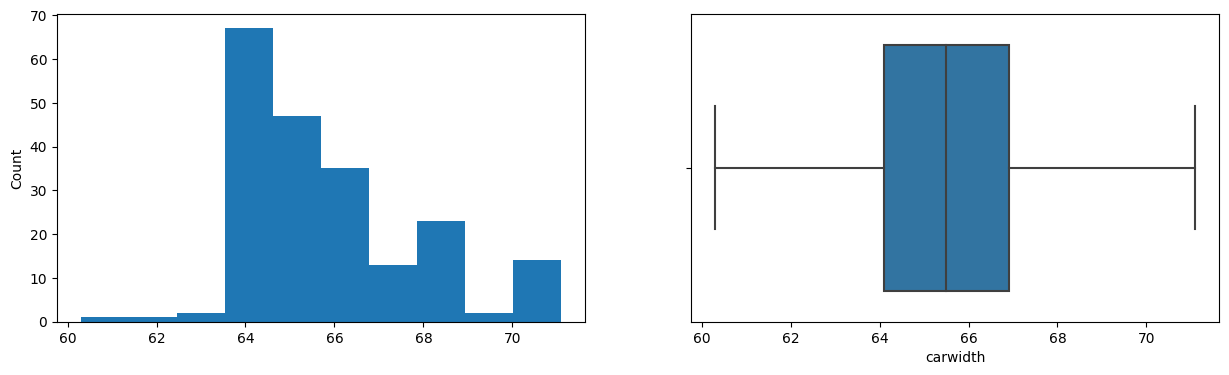

enginesize
Skew: 0.91


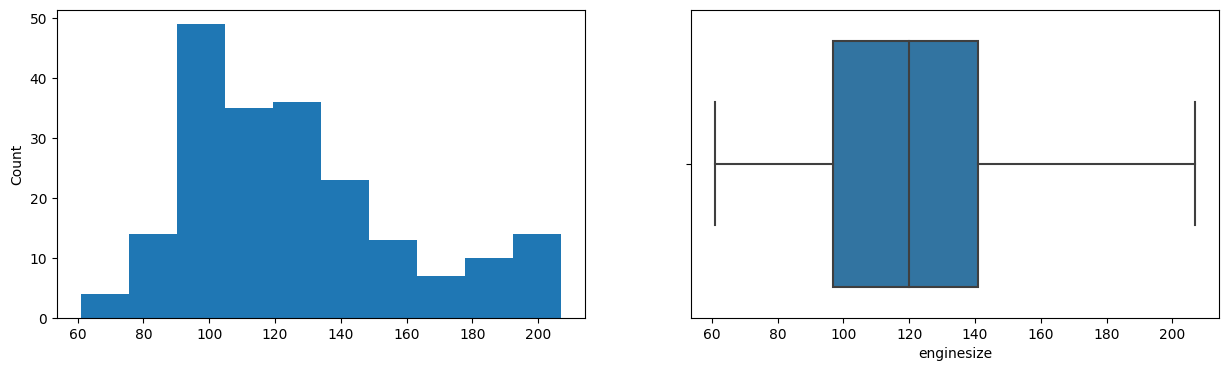

stroke
Skew: -0.38


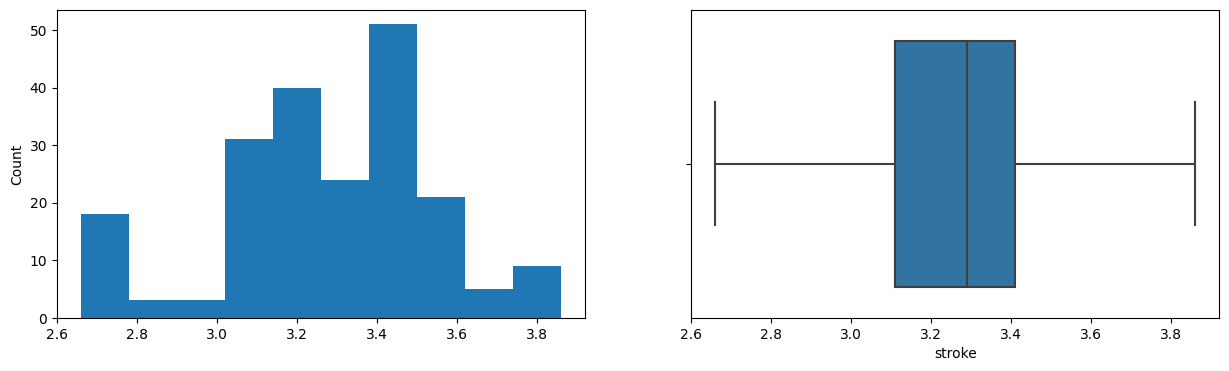

compressionratio
Skew: 0.04


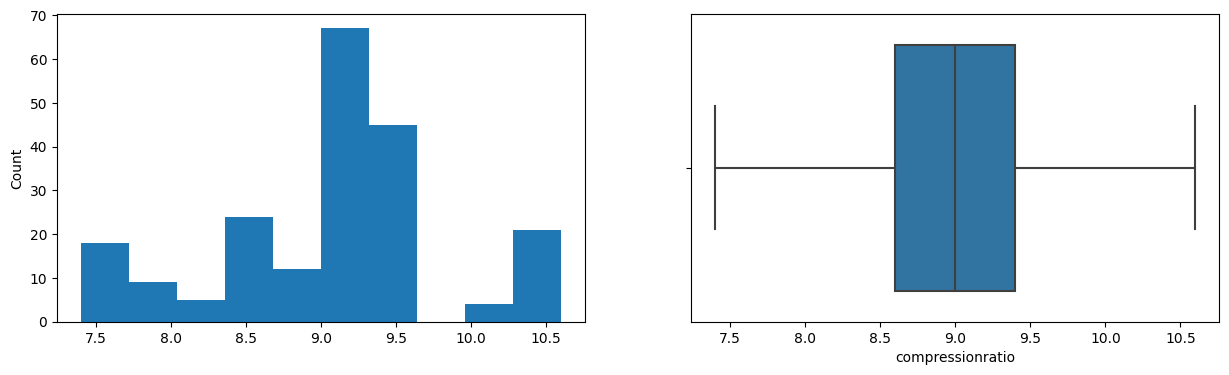

horsepower
Skew: 0.81


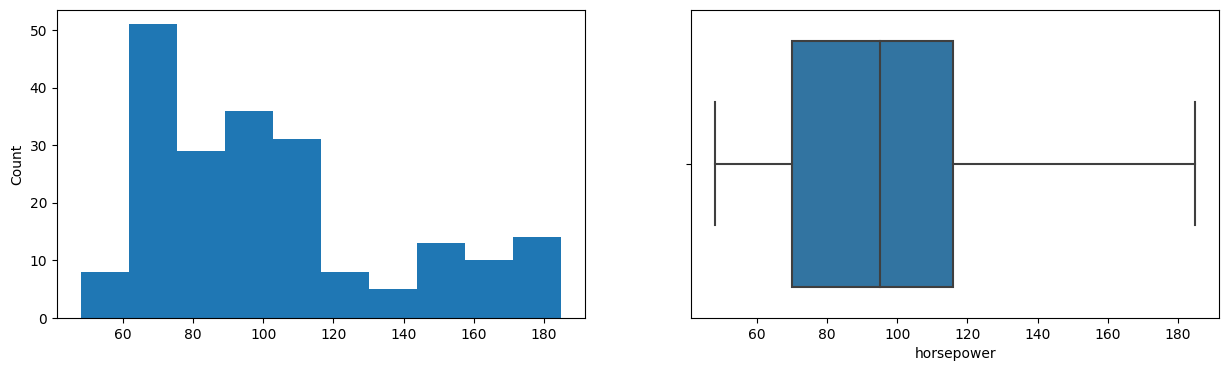

peakrpm
Skew: 0.05


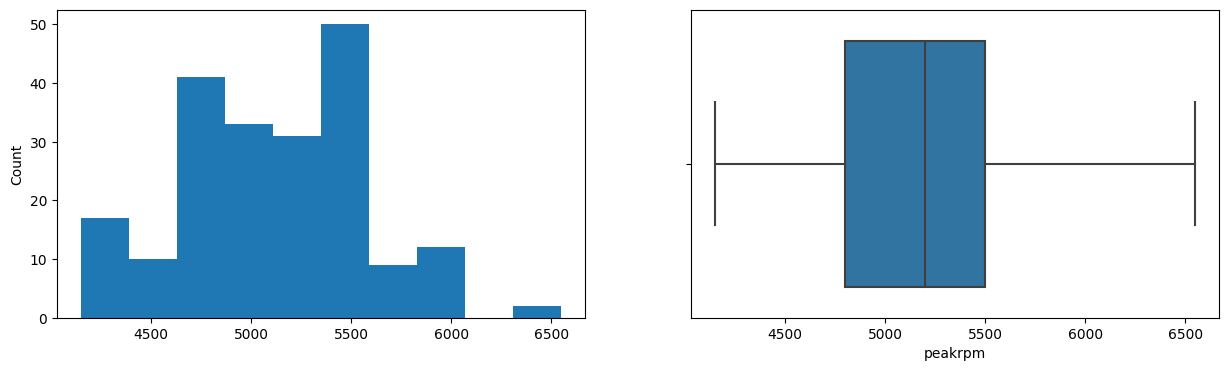

citympg
Skew: 0.6


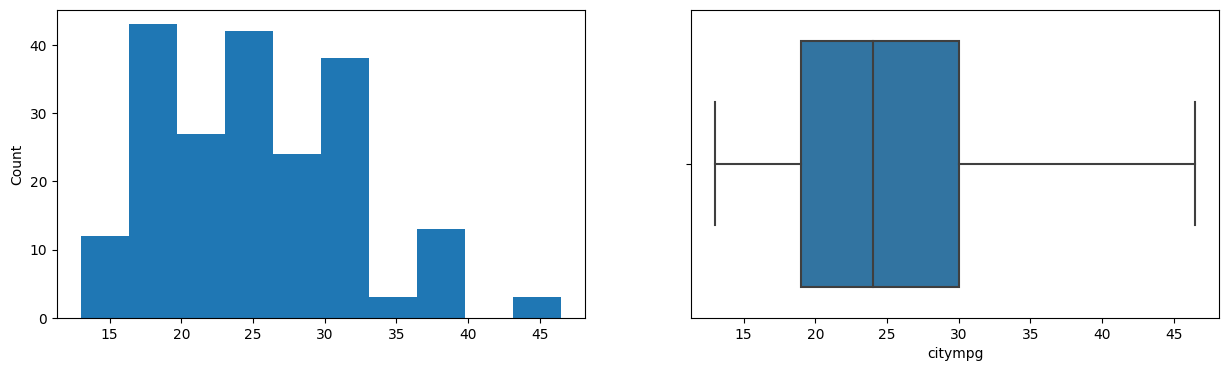

highwaympg
Skew: 0.35


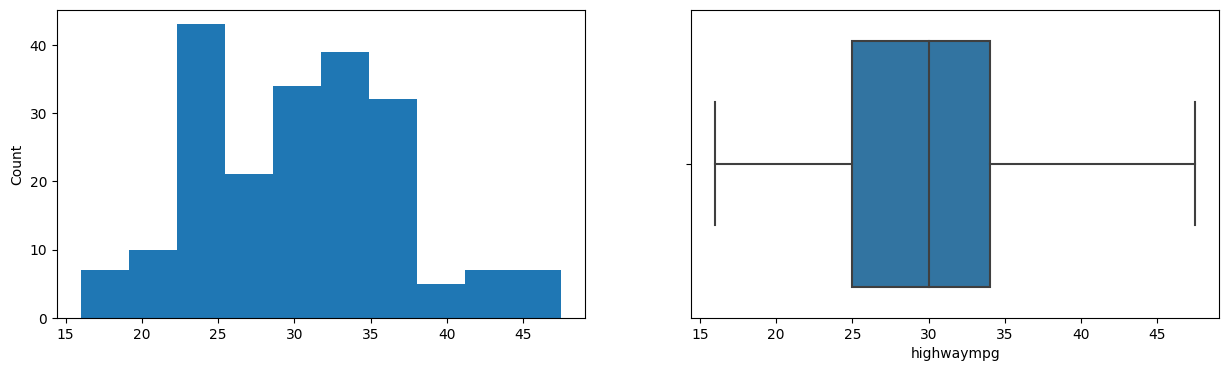

price
Skew: 1.22


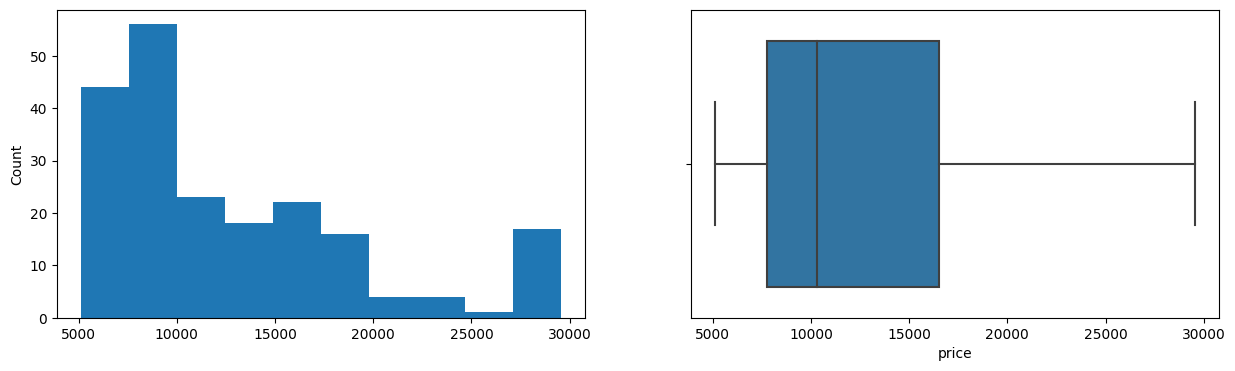

In [31]:
# Assuming you have already created the DataFrame df1

# List of numeric columns in df1
num_cols = ['wheelbase', 'carlength', 'carwidth', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# Iterate through each numeric column
for col in num_cols:
    print(col)
    print('Skew:', round(df1[col].skew(), 2))

    plt.figure(figsize=(15, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    df1[col].hist(grid=False)
    plt.ylabel('Count')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df1[col])

    plt.show()


## Bivariate Analysis

NUMERIC VARIABLES

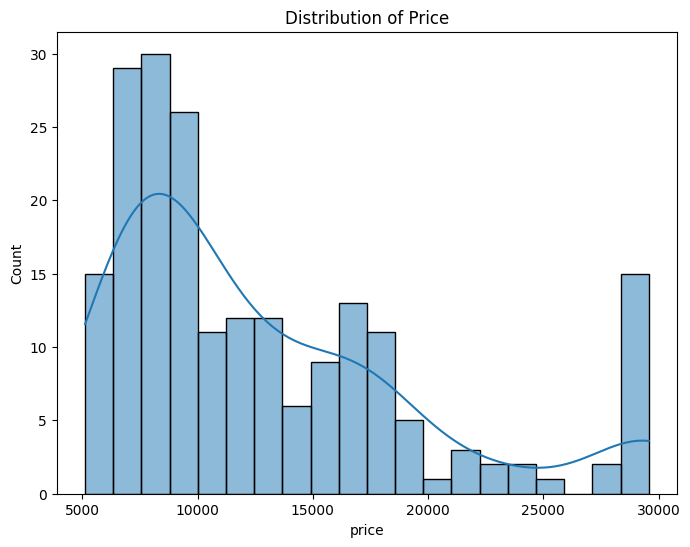

In [32]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df1['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

CATEGORICAL VARIABLE VS NUMERIC VARIABLE

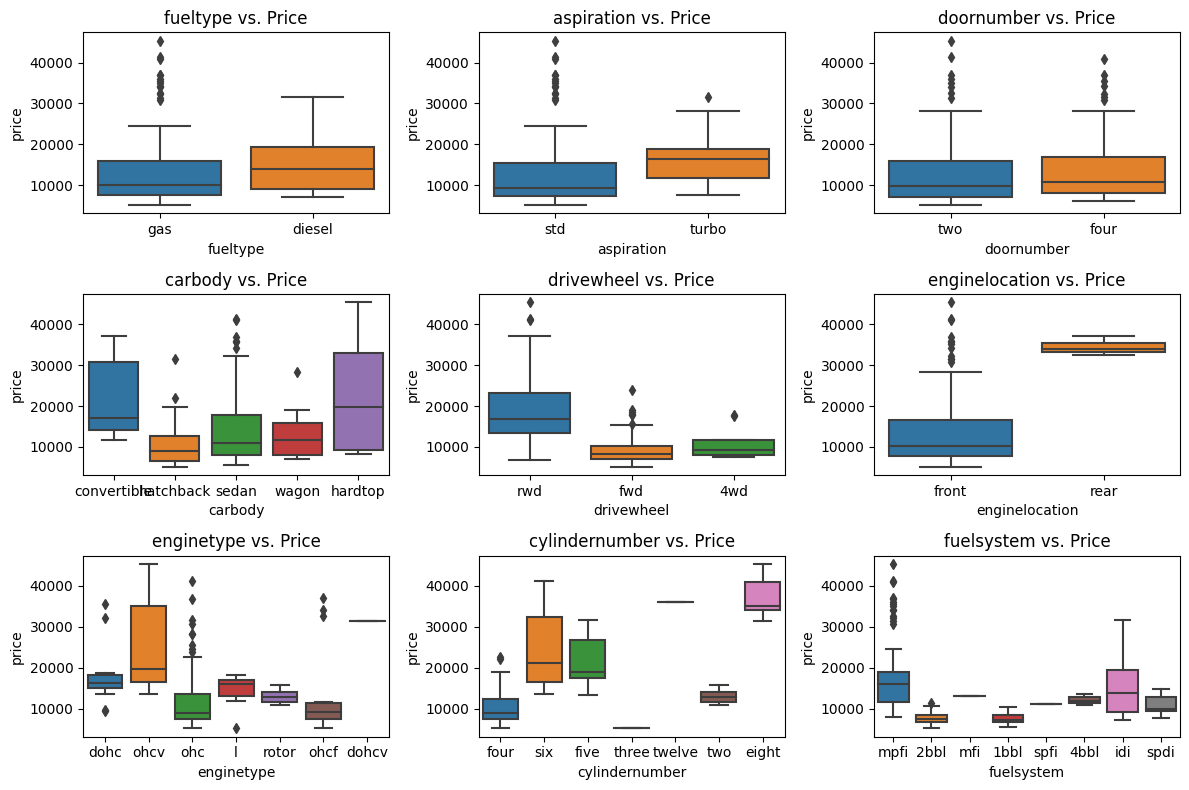

In [33]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

## Multivariate Analysis

### Correlation matrix

In [ ]:
#dataframe correlation
df1.corr(method='spearman')

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.156530   0.196709   0.155379  0.148254   
symboling        -0.156530   1.000000  -0.538023  -0.396365 -0.253340   
wheelbase         0.196709  -0.538023   1.000000   0.912390  0.812479   
carlength         0.155379  -0.396365   0.912390   1.000000  0.888499   
carwidth          0.148254  -0.253340   0.812479   0.888499  1.000000   
carheight         0.263124  -0.523124   0.632940   0.525148  0.351021   
curbweight        0.124474  -0.256490   0.765289   0.890415  0.863463   
enginesize        0.088516  -0.176642   0.648119   0.782511  0.769726   
boreratio         0.272795  -0.169593   0.537006   0.638926  0.608874   
stroke           -0.160081  -0.016973   0.228100   0.188627  0.242237   
compressionratio  0.145062   0.019648  -0.122044  -0.187306 -0.141702   
horsepower        0.005364  -0.009407   0.504472   0.660144  0.688040   
peakrpm          -0.229643   0.282124  -0.311855  -0.269277 -0.198594   
citympg           0.055776  -0.018317  -0.492797  -0.670014 -0.687534   
highwaympg        0.021270   0.053254  -0.538578  -0.697897 -0.701063   
price             0.021091  -0.144992   0.681115   0.803628  0.810998   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.263124    0.124474    0.088516   0.272795 -0.160081   
symboling         -0.523124   -0.256490   -0.176642  -0.169593 -0.016973   
wheelbase          0.632940    0.765289    0.648119   0.537006  0.228100   
carlength          0.525148    0.890415    0.782511   0.638926  0.188627   
carwidth           0.351021    0.863463    0.769726   0.608874  0.242237   
carheight          1.000000    0.345852    0.200626   0.215890 -0.016158   
curbweight         0.345852    1.000000    0.877604   0.701820  0.164150   
enginesize         0.200626    0.877604    1.000000   0.701254  0.292485   
boreratio          0.215890    0.701820    0.701254   1.000000 -0.085178   
stroke            -0.016158    0.164150    0.292485  -0.085178  1.000000   
compressionratio   0.000932   -0.212098   -0.228209  -0.150759 -0.069493   
horsepower         0.010647    0.807548    0.816639   0.639198  0.130402   
peakrpm           -0.296291   -0.236111   -0.271675  -0.298135 -0.072316   
citympg           -0.068587   -0.812948   -0.730014  -0.608718 -0.031544   
highwaympg        -0.132383   -0.834338   -0.721196  -0.614863 -0.031128   
price              0.242162    0.909013    0.826021   0.643614  0.112933   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.145062    0.005364 -0.229643  0.055776   
symboling                 0.019648   -0.009407  0.282124 -0.018317   
wheelbase                -0.122044    0.504472 -0.311855 -0.492797   
carlength                -0.187306    0.660144 -0.269277 -0.670014   
carwidth                 -0.141702    0.688040 -0.198594 -0.687534   
carheight                 0.000932    0.010647 -0.296291 -0.068587   
curbweight               -0.212098    0.807548 -0.236111 -0.812948   
enginesize               -0.228209    0.816639 -0.271675 -0.730014   
boreratio                -0.150759    0.639198 -0.298135 -0.608718   
stroke                   -0.069493    0.130402 -0.072316 -0.031544   
compressionratio          1.000000   -0.346327 -0.023271  0.472634   
horsepower               -0.346327    1.000000  0.112499 -0.910551   
peakrpm                  -0.023271    0.112499  1.000000 -0.131194   
citympg                   0.472634   -0.910551 -0.131194  1.000000   
highwaympg                0.438032   -0.885955 -0.057058  0.967737   
price                    -0.166309    0.854463 -0.065221 -0.829005   

                  highwaympg     price  
car_ID              0.021270  0.021091  
symboling           0.053254 -0.144992  
wheelbase          -0.538578  0.681115  
carlength          -0.697897  0.803628  
carwidth           -0.701063  0.810998  
carheight          -0.132383  0.242162  
curbwei

In [ ]:
#converting the categorical into numerical
df_num= df1
for col_name in df_num.columns:
    if(df_num[col_name ].dtype == 'object'):
     df_num[col_name] = df_num [col_name].astype('category')
     df_num[col_name] = df_num[ col_name].cat.codes
df_num
print(df_num)

     car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0         1          3        2         1           0           1        0   
1         2          3        3         1           0           1        0   
2         3          1        1         1           0           1        2   
3         4          2        4         1           0           0        3   
4         5          2        5         1           0           0        3   
..      ...        ...      ...       ...         ...         ...      ...   
200     201         -1      139         1           0           0        3   
201     202         -1      138         1           1           0        3   
202     203         -1      140         1           0           0        3   
203     204         -1      142         0           1           0        3   
204     205         -1      143         1           1           0        3   

     drivewheel  enginelocation  wheelbase  ...  enginesize  fu

### Relationship between variables

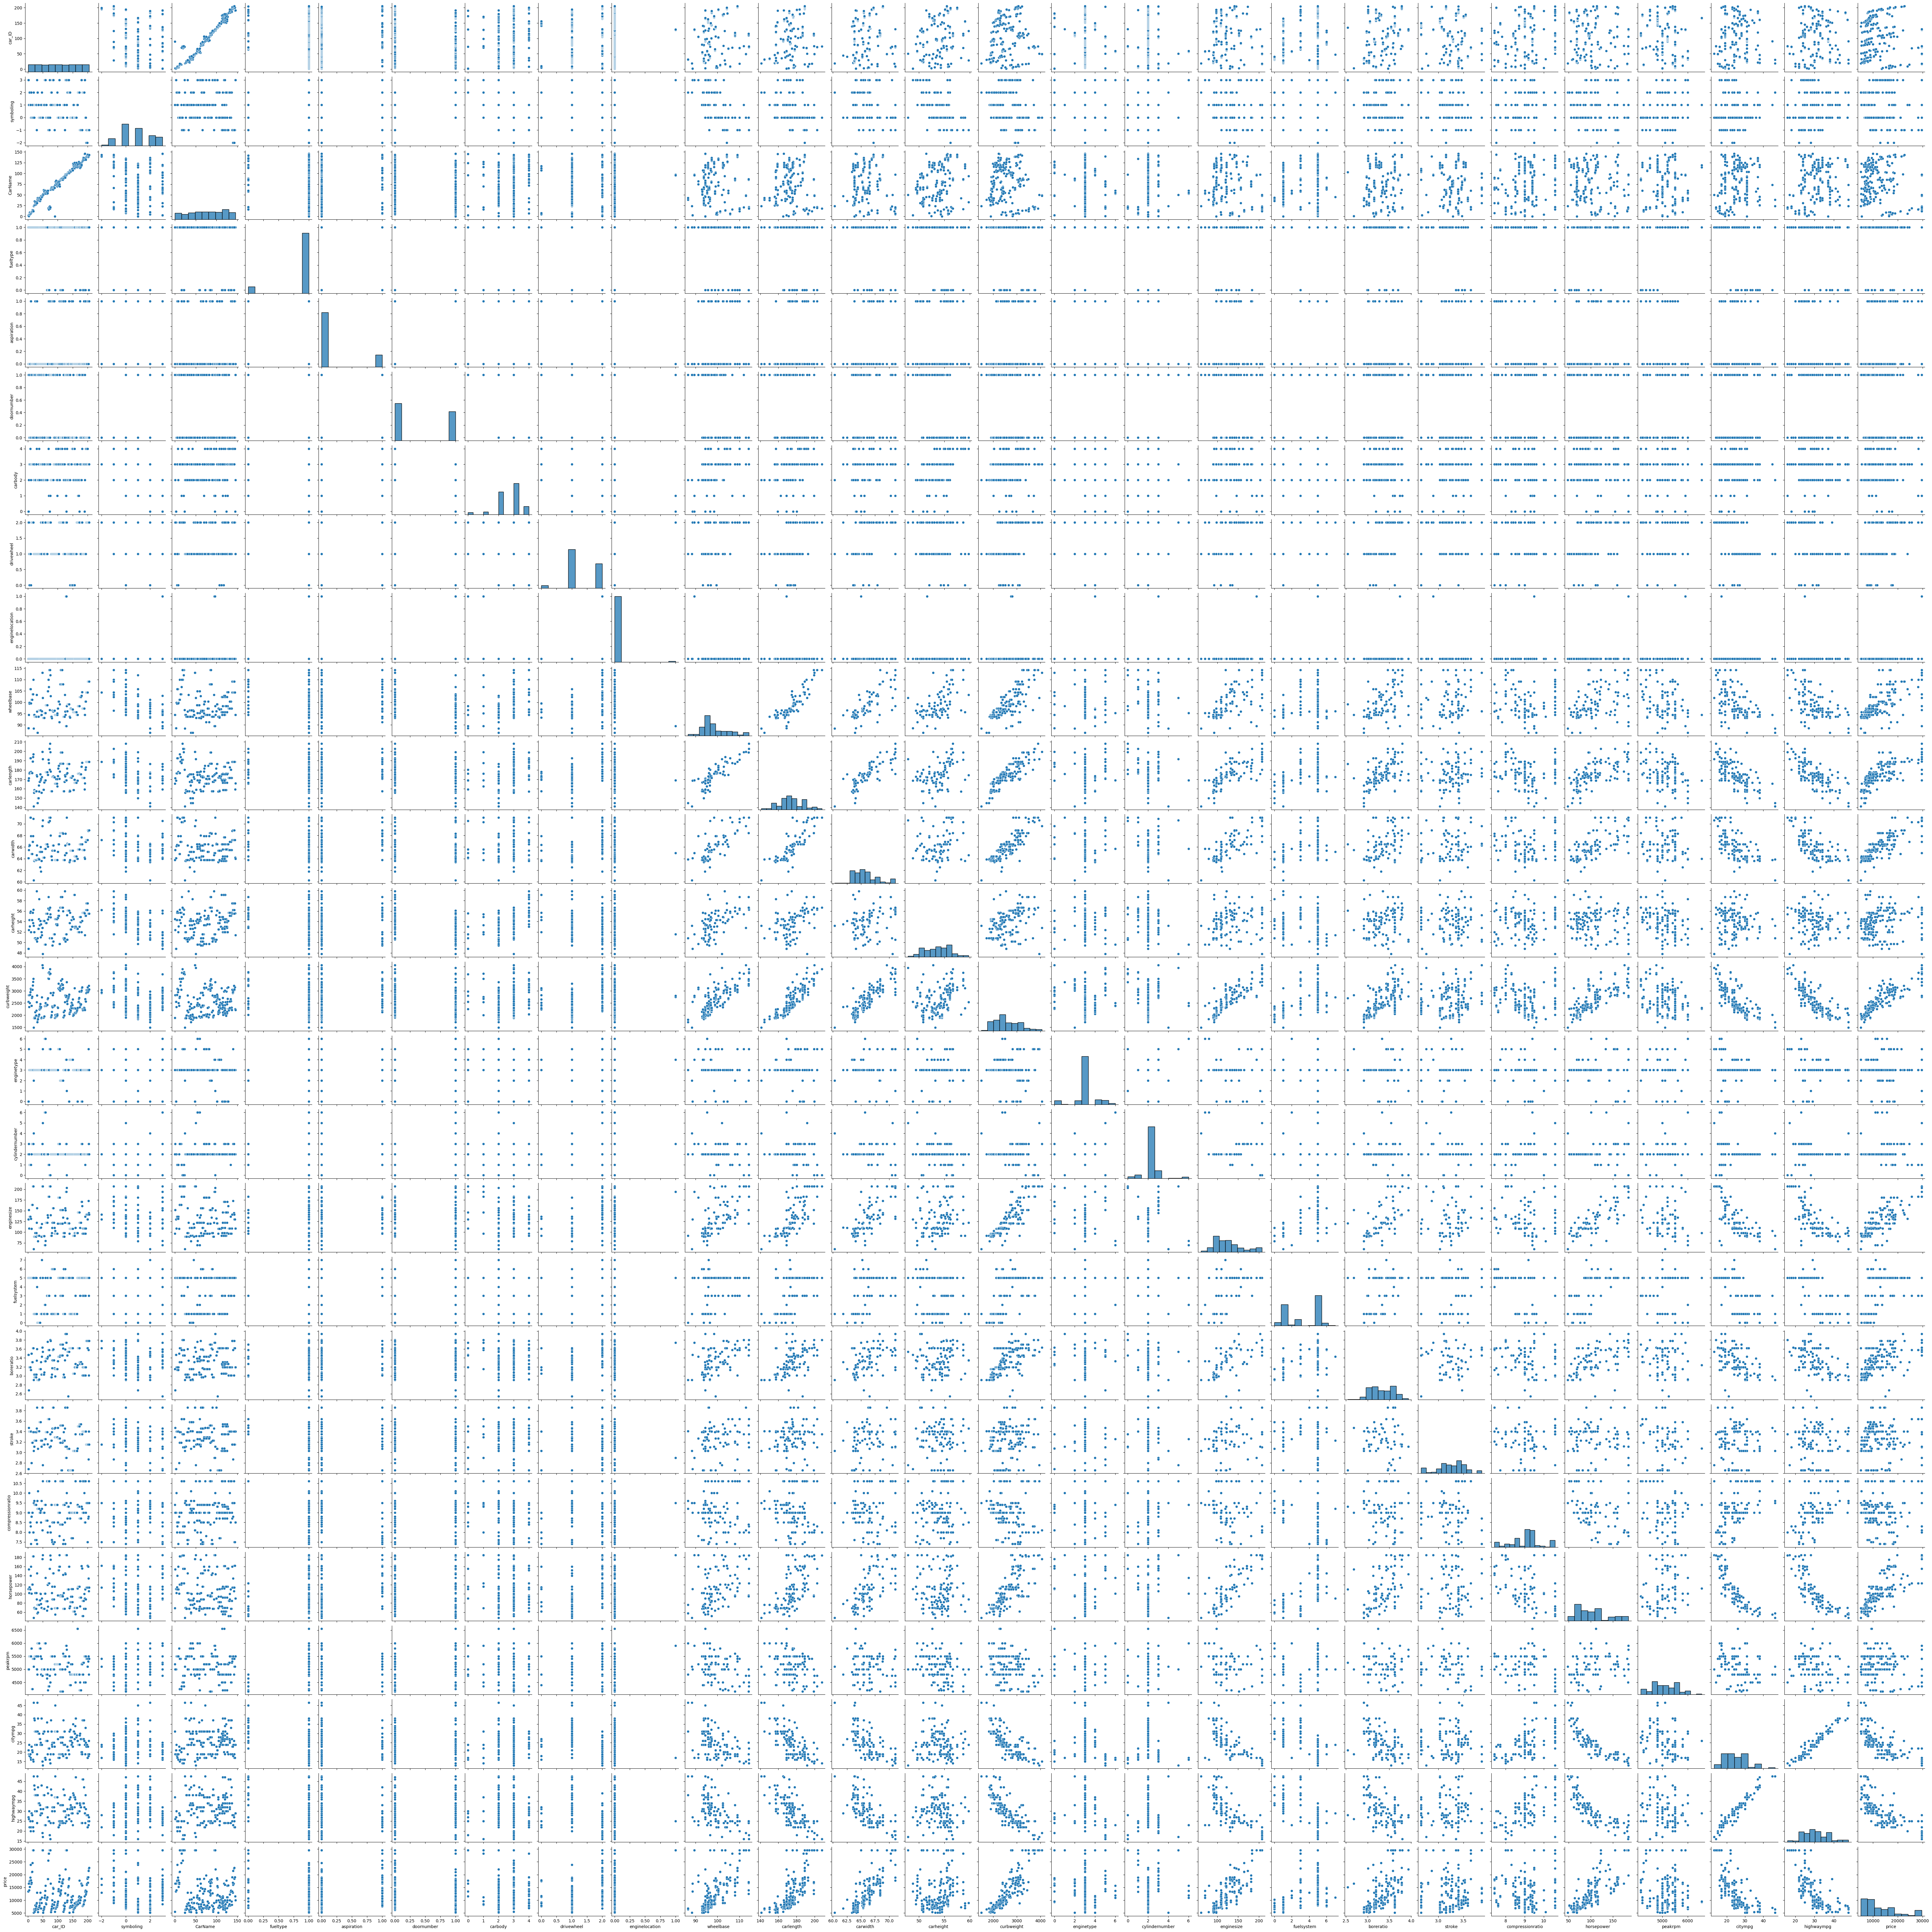

In [ ]:
sns.pairplot(df_num)

### Strength of correlation

In [ ]:
df_num.corr()

car_ID  symboling   CarName  fueltype  aspiration  \
car_ID            1.000000  -0.151621  0.967077 -0.125568    0.067729   
symboling        -0.151621   1.000000 -0.107095  0.194311   -0.059866   
CarName           0.967077  -0.107095  1.000000 -0.069435    0.019914   
fueltype         -0.125568   0.194311 -0.069435  1.000000   -0.401397   
aspiration        0.067729  -0.059866  0.019914 -0.401397    1.000000   
doornumber       -0.190352   0.664073 -0.171745  0.191491   -0.031792   
carbody           0.098303  -0.596135  0.099691 -0.147853    0.063028   
drivewheel        0.051406  -0.041671 -0.016129 -0.132257    0.066465   
enginelocation    0.051483   0.212471  0.055968  0.040070   -0.057191   
wheelbase         0.136702  -0.537515  0.025977 -0.314415    0.264436   
carlength         0.170636  -0.357612  0.053016 -0.212679    0.234539   
carwidth          0.059244  -0.235697 -0.066470 -0.239809    0.309321   
carheight         0.255960  -0.541038  0.201900 -0.284631    0.087311   
curbweight        0.071962  -0.227691 -0.049407 -0.217275    0.324902   
enginetype       -0.075130   0.050372 -0.090381  0.082695   -0.102963   
cylindernumber   -0.040912   0.197762  0.047154  0.110617   -0.133119   
enginesize        0.006263  -0.100869 -0.114889 -0.107971    0.164998   
fuelsystem        0.204898   0.091163  0.123845  0.041529    0.288086   
boreratio         0.260064  -0.130051  0.188598 -0.054451    0.212614   
stroke           -0.157469   0.006560 -0.182123 -0.266315    0.241716   
compressionratio  0.158596  -0.070206  0.147068 -0.648473   -0.140192   
horsepower       -0.017595   0.064578 -0.106263  0.170401    0.280095   
peakrpm          -0.205532   0.274328 -0.139731  0.478041   -0.183476   
citympg           0.018890  -0.038222  0.096412 -0.258696   -0.202875   
highwaympg        0.023471   0.027178  0.115906 -0.194567   -0.257215   
price            -0.089603  -0.092705 -0.210533 -0.142586    0.238992   

                  doornumber   carbody  drivewheel  enginelocation  wheelbase  \
car_ID             -0.190352  0.098303    0.051406        0.051483   0.136702   
symboling           0.664073 -0.596135   -0.041671        0.212471  -0.537515   
CarName            -0.171745  0.099691   -0.016129        0.055968   0.025977   
fueltype            0.191491 -0.147853   -0.132257        0.040070  -0.314415   
aspiration         -0.031792  0.063028    0.066465       -0.057191   0.264436   
doornumber          1.000000 -0.680358    0.098954        0.137757  -0.451066   
carbody            -0.680358  1.000000   -0.155745       -0.277009   0.407364   
drivewheel          0.098954 -0.155745    1.000000        0.147865   0.461193   
enginelocation      0.137757 -0.277009    0.147865        1.000000  -0.191286   
wheelbase          -0.451066  0.407364    0.461193       -0.191286   1.000000   
carlength          -0.398568  0.334433    0.485649       -0.050989   0.874780   
carwidth           -0.213309  0.137965    0.474919       -0.051865   0.798179   
carheight          -0.552208  0.568534   -0.019719       -0.106234   0.594171   
curbweight         -0.197379  0.128467    0.575111        0.050468   0.775265   
enginetype          0.062431 -0.037024   -0.116823        0.114127  -0.151317   
cylindernumber      0.154322 -0.048408    0.223238        0.135541  -0.169650   
enginesize         -0.035490 -0.074724    0.558998        0.249654   0.554028   
fuelsystem          0.015519 -0.065079    0.424686        0.105971   0.388060   
boreratio          -0.119258  0.010549    0.481827        0.185042   0.489113   
stroke              0.022335 -0.013962    0.074465       -0.159650   0.187658   
compressionratio   -0.068322  0.052293    0.127524        0.070968   0.011208   
horsepower          0.100546 -0.143591    0.532969        0.282094   0.398973   
peakrpm             0.247283 -0.109849   -0.040788        0.199209  -0.359412   
citympg             0.009959  0.033564   -0.451746       -0.154406  -0.469008   
highwaympg          0.0

In [ ]:
df_num.corr(method='spearman')

car_ID  symboling   CarName  fueltype  aspiration  \
car_ID            1.000000  -0.156530  0.973241 -0.125568    0.067729   
symboling        -0.156530   1.000000 -0.116181  0.209655   -0.076620   
CarName           0.973241  -0.116181  1.000000 -0.073206    0.019934   
fueltype         -0.125568   0.209655 -0.073206  1.000000   -0.401397   
aspiration        0.067729  -0.076620  0.019934 -0.401397    1.000000   
doornumber       -0.190352   0.679462 -0.176908  0.191491   -0.031792   
carbody           0.110600  -0.608863  0.101168 -0.170138    0.044720   
drivewheel        0.061609  -0.073682  0.002806 -0.131019    0.082006   
enginelocation    0.051483   0.189089  0.049770  0.040070   -0.057191   
wheelbase         0.196709  -0.538023  0.109008 -0.276784    0.226850   
carlength         0.155379  -0.396365  0.062974 -0.193855    0.246698   
carwidth          0.148254  -0.253340  0.053703 -0.232176    0.306708   
carheight         0.263124  -0.523124  0.214931 -0.298162    0.108209   
curbweight        0.124474  -0.256490  0.028087 -0.195995    0.342186   
enginetype       -0.017929   0.073868 -0.047261  0.165467   -0.145859   
cylindernumber    0.027526   0.096895  0.093981  0.148020   -0.172255   
enginesize        0.088516  -0.176642 -0.010173 -0.132261    0.231444   
fuelsystem        0.200356   0.084665  0.142218  0.074500    0.297505   
boreratio         0.272795  -0.169593  0.203184 -0.043695    0.192713   
stroke           -0.160081  -0.016973 -0.189605 -0.321903    0.234616   
compressionratio  0.145062   0.019648  0.143462 -0.515154   -0.135760   
horsepower        0.005364  -0.009407 -0.076935  0.159861    0.319171   
peakrpm          -0.229643   0.282124 -0.173220  0.454973   -0.131227   
citympg           0.055776  -0.018317  0.123517 -0.234219   -0.218351   
highwaympg        0.021270   0.053254  0.097978 -0.157978   -0.277593   
price             0.021091  -0.144992 -0.067695 -0.141154    0.310093   

                  doornumber   carbody  drivewheel  enginelocation  wheelbase  \
car_ID             -0.190352  0.110600    0.061609        0.051483   0.196709   
symboling           0.679462 -0.608863   -0.073682        0.189089  -0.538023   
CarName            -0.176908  0.101168    0.002806        0.049770   0.109008   
fueltype            0.191491 -0.170138   -0.131019        0.040070  -0.276784   
aspiration         -0.031792  0.044720    0.082006       -0.057191   0.226850   
doornumber          1.000000 -0.731747    0.092545        0.137757  -0.466200   
carbody            -0.731747  1.000000   -0.087727       -0.211130   0.440962   
drivewheel          0.092545 -0.087727    1.000000        0.153539   0.404279   
enginelocation      0.137757 -0.211130    0.153539        1.000000  -0.197959   
wheelbase          -0.466200  0.440962    0.404279       -0.197959   1.000000   
carlength          -0.381786  0.367769    0.489173       -0.075199   0.912390   
carwidth           -0.224790  0.169183    0.504794       -0.053655   0.812479   
carheight          -0.551854  0.588177    0.026841       -0.117467   0.632940   
curbweight         -0.213028  0.192523    0.599142        0.072078   0.765289   
enginetype          0.092829 -0.096425   -0.158868        0.203560  -0.200680   
cylindernumber      0.109687 -0.066941    0.275458        0.238656  -0.109345   
enginesize         -0.084318  0.028905    0.560862        0.185571   0.648119   
fuelsystem          0.030735 -0.024608    0.419810        0.100510   0.421531   
boreratio          -0.126134  0.073779    0.526677        0.181551   0.537006   
stroke              0.000250 -0.024997    0.001304       -0.164994   0.228100   
compressionratio    0.012973  0.006877    0.108208        0.136978  -0.122044   
horsepower          0.068569 -0.069192    0.586876        0.205061   0.504472   
peakrpm             0.216871 -0.114034   -0.086463        0.186793  -0.311855   
citympg            -0.031676  0.009351   -0.515796       -0.173623  -0.492797   
highwaympg          0.0

### Strength of correlation by visualization

<Axes: >

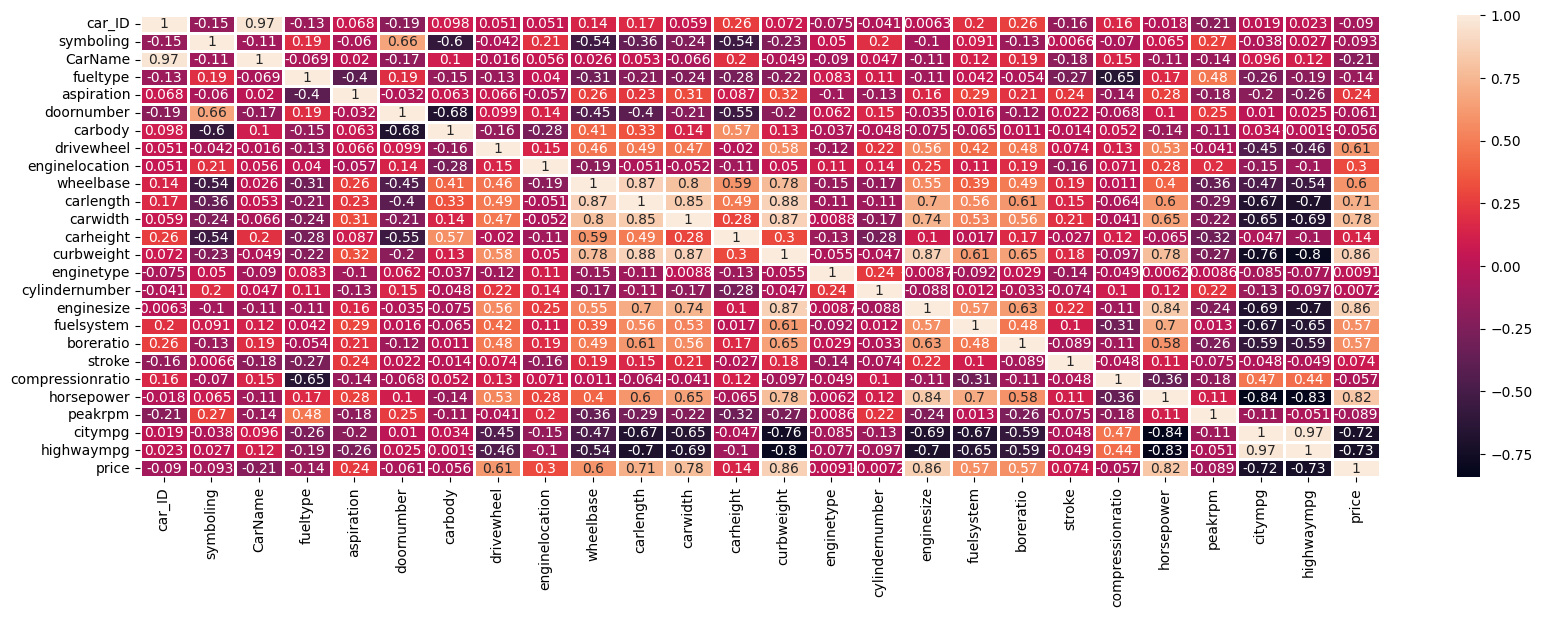

In [ ]:
sns.heatmap(df_num.corr(),linewidths=1,annot=True)

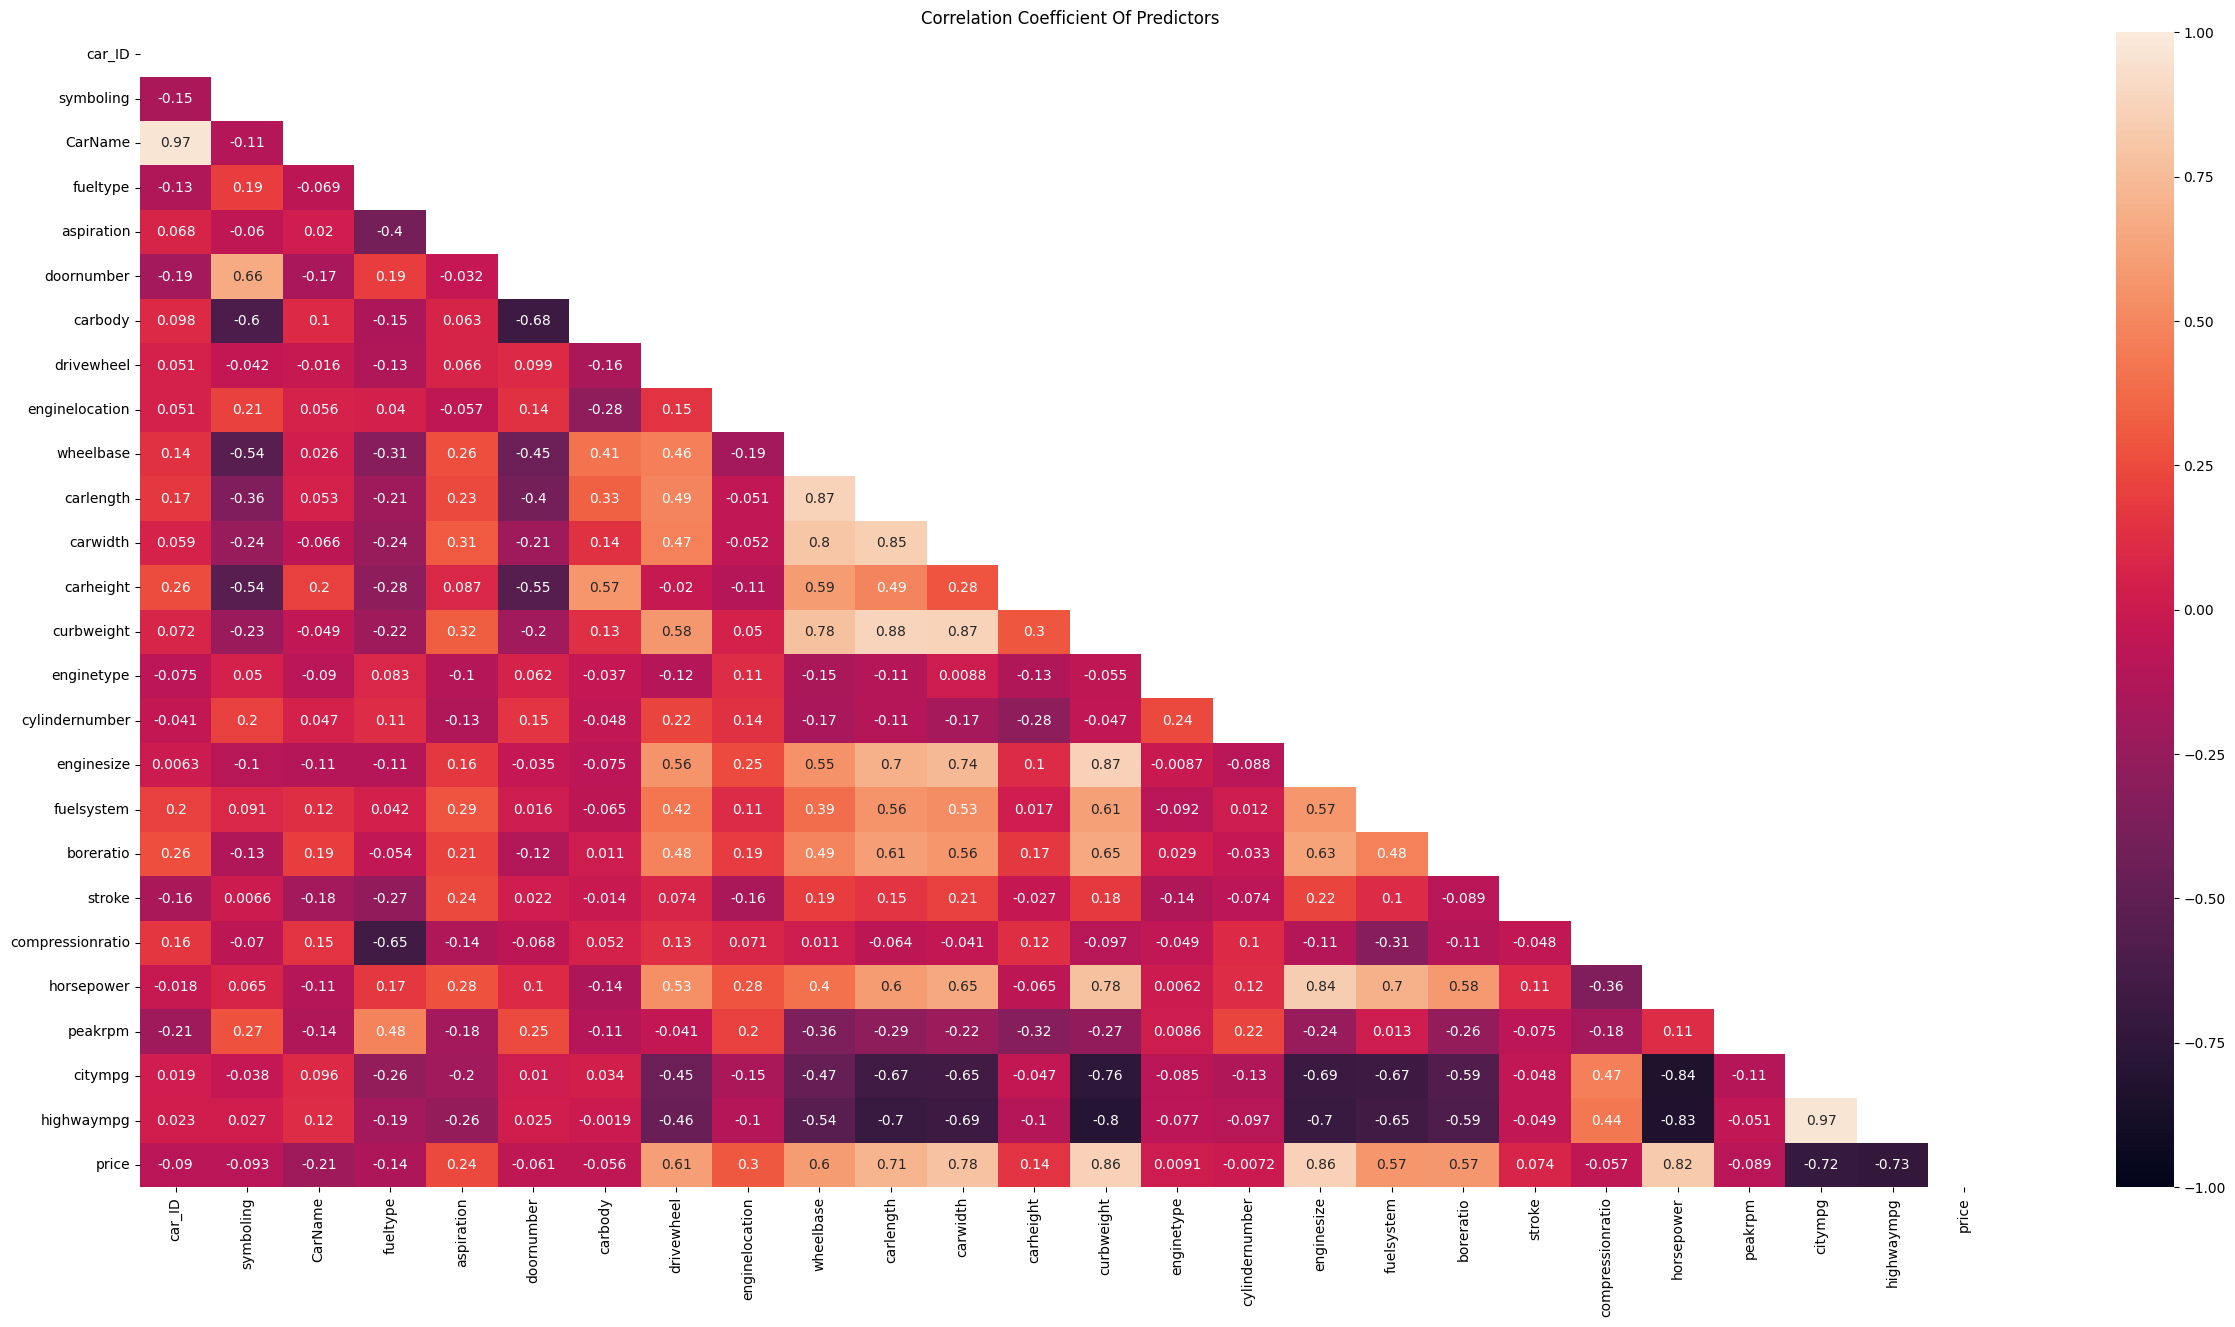

In [ ]:
# set figure size
plt.figure(figsize=(30,15))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df_num.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df_num.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

### Pairs of each variables

In [ ]:
correlation_matrix=df_num.corr()
correlation_pairs=correlation_matrix.unstack()
correlation_pairs

car_ID  car_ID        1.000000
        symboling    -0.151621
        CarName       0.967077
        fueltype     -0.125568
        aspiration    0.067729
                        ...   
price   horsepower    0.821715
        peakrpm      -0.088630
        citympg      -0.718290
        highwaympg   -0.733692
        price         1.000000
Length: 676, dtype: float64

### Sorting pairs

In [ ]:
sorted_pairs=correlation_pairs.sort_values()
sorted_pairs

horsepower        citympg            -0.842676
citympg           horsepower         -0.842676
horsepower        highwaympg         -0.830011
highwaympg        horsepower         -0.830011
                  curbweight         -0.803960
                                        ...   
compressionratio  compressionratio    1.000000
horsepower        horsepower          1.000000
peakrpm           peakrpm             1.000000
carheight         carheight           1.000000
price             price               1.000000
Length: 676, dtype: float64

### Grouped sorted pairs

In [ ]:
corr_matrix = df_num.corr()

positive_pairs = []
negative_pairs = []
no_correlation = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        correlation = corr_matrix.loc[col1, col2]
        if correlation > 0:
            positive_pairs.append((col1, col2, correlation))
        elif correlation < 0:
            negative_pairs.append((col1, col2, correlation))
        else:
            no_correlation.append((col1, col2, correlation))

df_positive = pd.DataFrame(positive_pairs, columns=['Column 1', 'Column 2', 'Correlation'])
df_negative = pd.DataFrame(negative_pairs, columns=['Column 1', 'Column 2', 'Correlation'])
df_no_correlation = pd.DataFrame(no_correlation, columns=['Column 1', 'Column 2', 'Correlation'])

print("Positive_pairs:")
print(df_positive)

print("Negative pairs:")
print(df_negative)


print("No correlation:")
print(df_no_correlation)



Positive_pairs:
             Column 1        Column 2  Correlation
0              car_ID         CarName     0.967077
1              car_ID      aspiration     0.067729
2              car_ID         carbody     0.098303
3              car_ID      drivewheel     0.051406
4              car_ID  enginelocation     0.051483
..                ...             ...          ...
163  compressionratio         citympg     0.468369
164  compressionratio      highwaympg     0.435872
165        horsepower         peakrpm     0.114871
166        horsepower           price     0.821715
167           citympg      highwaympg     0.966524

[168 rows x 3 columns]
Negative pairs:
       Column 1        Column 2  Correlation
0        car_ID       symboling    -0.151621
1        car_ID        fueltype    -0.125568
2        car_ID      doornumber    -0.190352
3        car_ID      enginetype    -0.075130
4        car_ID  cylindernumber    -0.040912
..          ...             ...          ...
152     peakrpm  

In [ ]:
df_positive

Column 1        Column 2  Correlation
0              car_ID         CarName     0.967077
1              car_ID      aspiration     0.067729
2              car_ID         carbody     0.098303
3              car_ID      drivewheel     0.051406
4              car_ID  enginelocation     0.051483
..                ...             ...          ...
163  compressionratio         citympg     0.468369
164  compressionratio      highwaympg     0.435872
165        horsepower         peakrpm     0.114871
166        horsepower           price     0.821715
167           citympg      highwaympg     0.966524

[168 rows x 3 columns]

In [ ]:
df_negative

Column 1        Column 2  Correlation
0        car_ID       symboling    -0.151621
1        car_ID        fueltype    -0.125568
2        car_ID      doornumber    -0.190352
3        car_ID      enginetype    -0.075130
4        car_ID  cylindernumber    -0.040912
..          ...             ...          ...
152     peakrpm         citympg    -0.113602
153     peakrpm      highwaympg    -0.051123
154     peakrpm           price    -0.088630
155     citympg           price    -0.718290
156  highwaympg           price    -0.733692

[157 rows x 3 columns]

In [ ]:
df_no_correlation

Empty DataFrame
Columns: [Column 1, Column 2, Correlation]
Index: []

### Sorted high pairs

In [ ]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

carwidth          fuelsystem          0.528580
fuelsystem        carwidth            0.528580
drivewheel        horsepower          0.532969
horsepower        drivewheel          0.532969
enginesize        wheelbase           0.554028
                                        ...   
compressionratio  compressionratio    1.000000
horsepower        horsepower          1.000000
peakrpm           peakrpm             1.000000
carheight         carheight           1.000000
price             price               1.000000
Length: 108, dtype: float64

### Target Variable analysis

Target Variable: Price

Correlation Values

In [ ]:
df_num.corr()[['price']].sort_values('price', ascending=False)


price
price             1.000000
curbweight        0.864597
enginesize        0.860063
horsepower        0.821715
carwidth          0.783230
carlength         0.712455
drivewheel        0.606814
wheelbase         0.595909
boreratio         0.572685
fuelsystem        0.570273
enginelocation    0.304551
aspiration        0.238992
carheight         0.142033
stroke            0.073830
enginetype        0.009102
cylindernumber   -0.007226
carbody          -0.055794
compressionratio -0.056573
doornumber       -0.061434
peakrpm          -0.088630
car_ID           -0.089603
symboling        -0.092705
fueltype         -0.142586
CarName          -0.210533
citympg          -0.718290
highwaympg       -0.733692

Relationship between variables

In [ ]:
sns.pairplot(df_num,hue="price", palette="husl")

Strength of correlation

In [ ]:
sns.heatmap(df_num.corr()[['price']].sort_values(by='price',ascending=False),linewidths=1,annot=True,cmap='coolwarm')

Direction of correlation

In [ ]:
# Create a scatter plot matrix
sns.pairplot(df_num, x_vars=['price'],
             y_vars=['curbweight', 'enginesize', 'horsepower'], kind='scatter', height=5)

# Show plot
sns.show()


Grouping correlation

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_num.corr()

# Get the correlation coefficients of 'TAX TO GOVERNMENT' with other variables
tax_corr = corr_matrix['price'].drop('price')

# Define the correlation categories
categories = {
    'Very Strong Positive Correlation': (0.80, 1),
    'Strong Positive Correlation': (0.60, 0.79),
    'Moderate Positive Correlation': (0.40, 0.59),
    'Weak Positive Correlation': (0.20, 0.39),
    'Very Weak Positive Correlation': (0.00, 0.19),
    'Very Strong Negative Correlation': (-1.00, -0.80),
    'Strong Negative Correlation': (-0.79, -0.60),
    'Moderate Negative Correlation': (-0.59, -0.40),
    'Weak Negative Correlation': (-0.39, -0.20),
    'Very Weak Negative Correlation': (-0.19, 0.01)
}

# Create an empty dictionary to hold the dataframes
df_dict = {}

# Categorize the correlation coefficients and create a separate dataframe for each category
for category, (min_value, max_value) in categories.items():
    temp_df = tax_corr[(tax_corr >= min_value) & (tax_corr <= max_value)].to_frame()
    df_dict[category] = temp_df

# Print each dataframe
for category, df in df_dict.items():
    print(f"{category}:\n{df}\n")


## Observations:
**1)Univariate analysis:**

Found outliers in numerical values.

Handled outliers by percentile method.



**2)Bivariate analysis:** Price distribution shows right skew.

3**)Multivariate analysis:**Very Strong Positive Correlation:
               price
curbweight  0.864597
enginesize  0.860063
horsepower  0.821715

# 4-ANALYSING WITH QUESTIONS

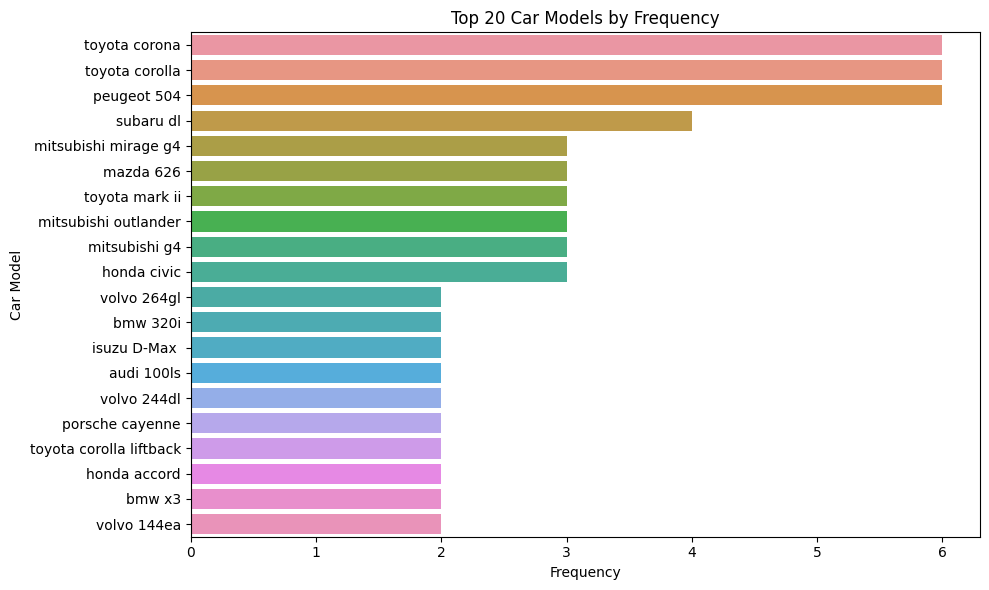

In [34]:
n = 20  # Number of top car models to plot
top_car_models = df1['CarName'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

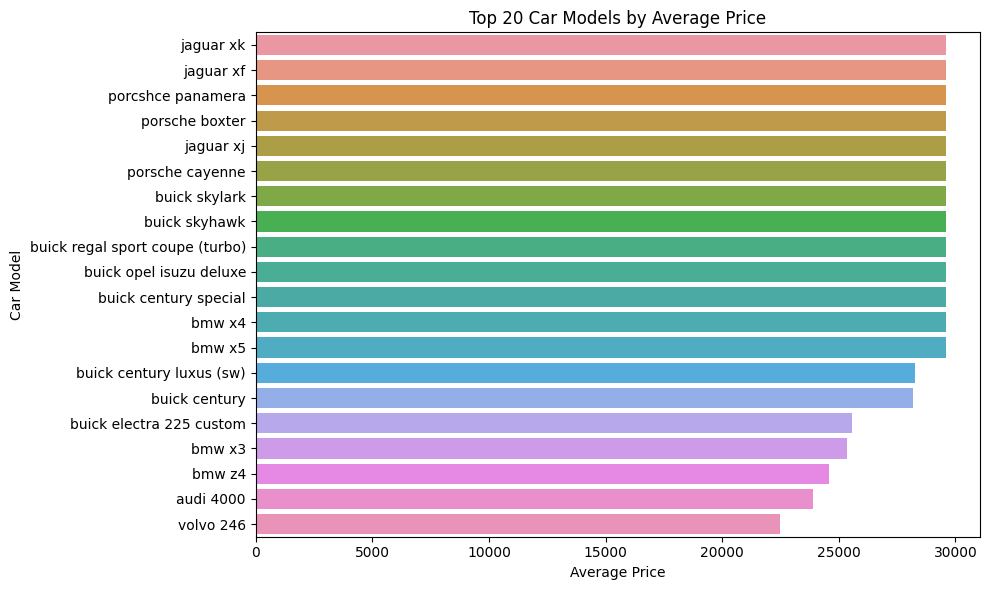

In [35]:
# Calculate average price for each car model
avg_prices_by_car = df1.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

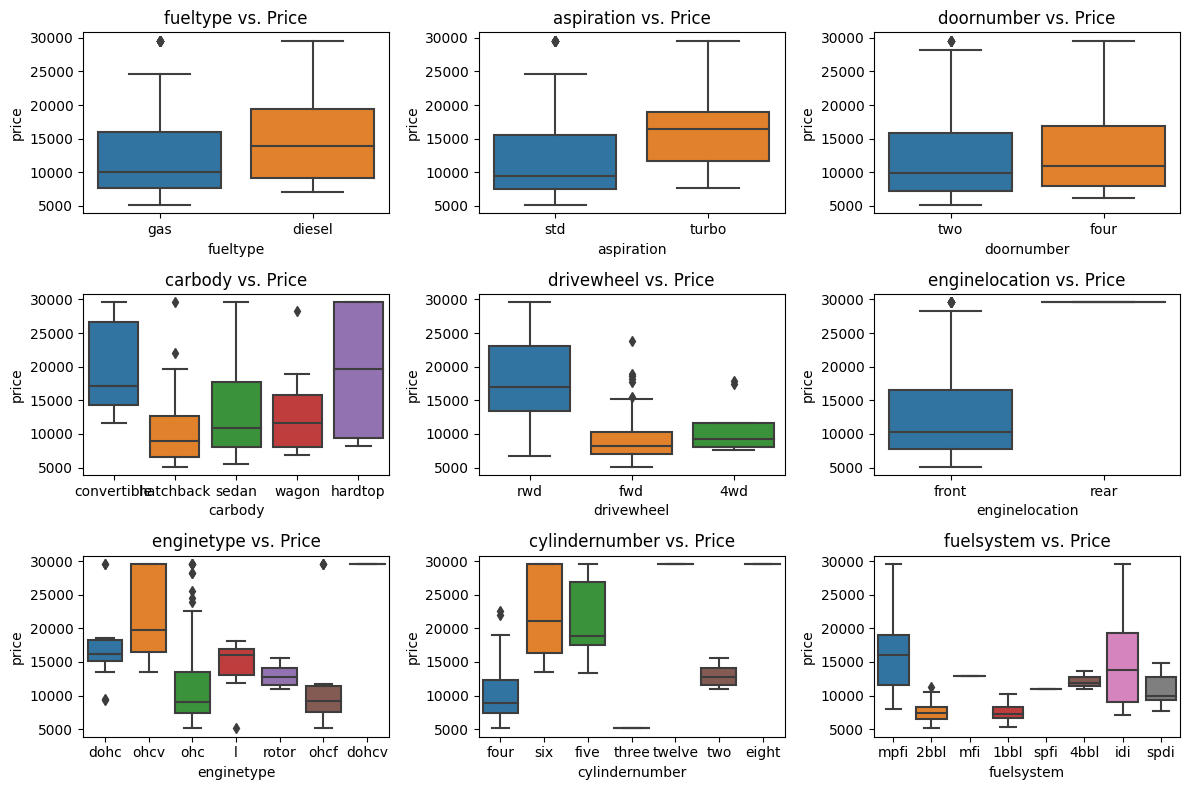

In [38]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df1, x=feature, y='price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

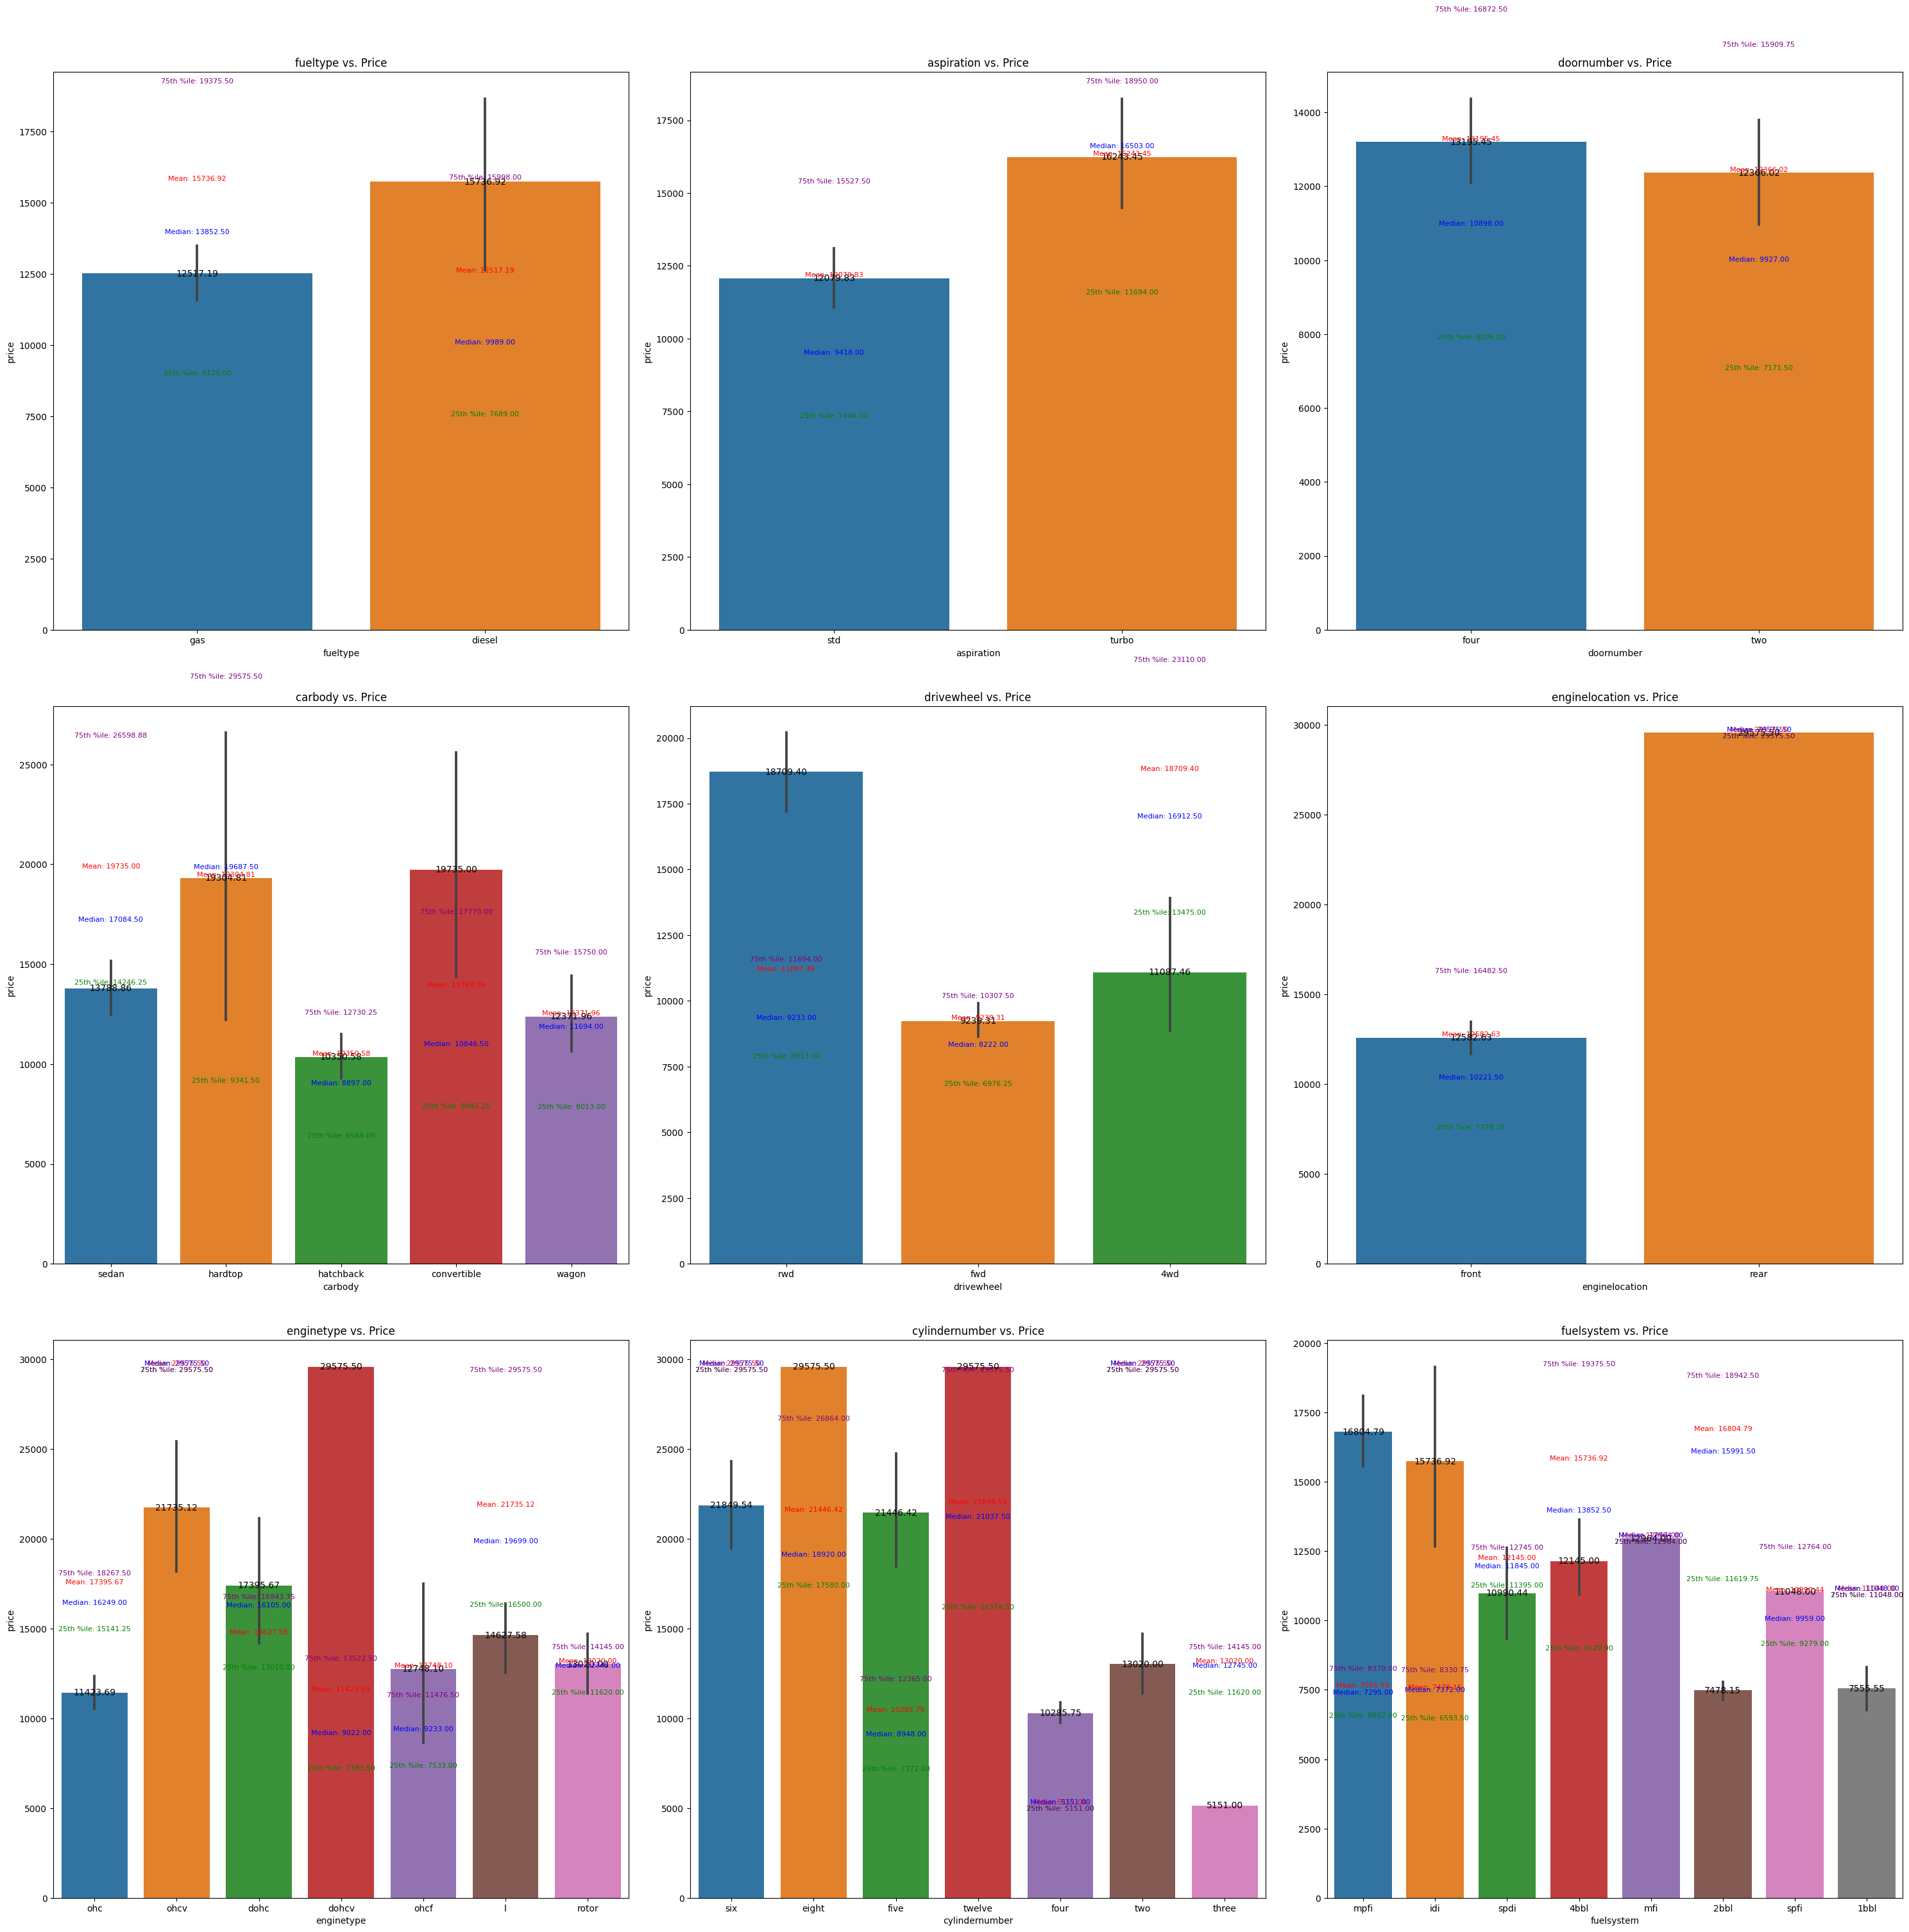

In [47]:
# Set a larger figure size
plt.figure(figsize=(30, 30))

# Sort the DataFrame by 'price' in descending order
df_sorted = df1.sort_values(by='price', ascending=False)

# Create a bar plot for each categorical feature
for i, feature in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    ax = sns.barplot(data=df_sorted, x=feature, y='price')
    plt.title(f'{feature} vs. Price')

    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black')

    # Calculate and display statistics
    mean_price = df_sorted.groupby(feature)['price'].mean()
    median_price = df_sorted.groupby(feature)['price'].median()
    percentile_25 = df_sorted.groupby(feature)['price'].quantile(0.25)
    percentile_75 = df_sorted.groupby(feature)['price'].quantile(0.75)

    for j, (mean, median, p25, p75) in enumerate(zip(mean_price, median_price, percentile_25, percentile_75)):
        ax.text(j, mean, f'Mean: {mean:.2f}', ha='center', va='bottom', fontsize=8, color='red')
        ax.text(j, median, f'Median: {median:.2f}', ha='center', va='bottom', fontsize=8, color='blue')
        ax.text(j, p25, f'25th %ile: {p25:.2f}', ha='center', va='top', fontsize=8, color='green')
        ax.text(j, p75, f'75th %ile: {p75:.2f}', ha='center', va='top', fontsize=8, color='purple')

plt.tight_layout()
plt.show()


In [48]:
# Perform ANOVA for each categorical feature
results = []
for feature in categorical_columns:
    model = ols(f'price ~ {feature}', data=df1).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    results.append((feature, anova_table['PR(>F)'][0]))

# Create a DataFrame with ANOVA results
anova_results = pd.DataFrame(results, columns=['Categorical Feature', 'p-value'])

# Calculate summary statistics for each category
summary_stats = df1.groupby(categorical_columns)['price'].describe()

# Display ANOVA results
print("ANOVA results:")
print(anova_results)

# Display summary statistics
print("\nSummary statistics:")
print(summary_stats)


ANOVA results:
  Categorical Feature       p-value
0            fueltype  4.140290e-02
1          aspiration  5.583742e-04
2          doornumber  3.815476e-01
3             carbody  2.274067e-05
4          drivewheel  1.784728e-27
5      enginelocation  9.005894e-06
6          enginetype  2.891296e-08
7      cylindernumber  4.574046e-37
8          fuelsystem  1.243764e-20

Summary statistics:
                                                                                                         count  \
fueltype aspiration doornumber carbody   drivewheel enginelocation enginetype cylindernumber fuelsystem          
diesel   std        four       hatchback fwd        front          ohc        four           idi           1.0   
                               sedan     fwd        front          ohc        four           idi           3.0   
                                         rwd        front          ohc        four           idi           1.0   
                    two        sed

## Observations:

- Most top car is Toyota corona by frequency.
- Most top car is Jaguar xk with average price.

- Here are insights about each of the specified categorical features vs. price along with the provided metrics:

1. **Fuel Type vs. Price**:
   - Diesel vs. Gas: Diesel cars tend to have lower prices compared to gas cars. The mean price for diesel is generally lower, but there is no significant difference in variability between the two fuel types.

2. **Aspiration Type vs. Price**:
   - Std vs. Turbo: Cars with turbochargers (turbo) have higher average prices compared to standard aspiration (std) cars. Turbocharged cars also exhibit a wider price range.

3. **Number of Doors vs. Price**:
   - Four vs. Two: Cars with four doors generally have more consistent prices than those with two doors. Two-door cars have a wider price distribution.

4. **Car Body Type vs. Price**:
   - Hatchback vs. Sedan: Hatchbacks typically have lower prices compared to sedans. The mean price for hatchbacks is lower, with less variability.

5. **Drive Wheel Type vs. Price**:
   - FWD vs. RWD: Cars with front-wheel drive (FWD) generally have lower average prices compared to rear-wheel drive (RWD) cars. RWD cars also show greater price variation.

6. **Engine Location vs. Price**:
   - Front Engine: Regardless of engine location, cars with the engine in the front tend to have consistent pricing.

7. **Engine Type vs. Price**:
   - OHC vs. OHCV: Cars with overhead camshaft (OHC) engines have more consistent prices compared to those with overhead camshaft, V-shaped (OHCV) engines.

8. **Number of Cylinders vs. Price**:
   - Four Cylinders vs. Six Cylinders: Cars with four cylinders have more consistent prices compared to six-cylinder cars, with OHCV engines generally having higher prices.

9. **Fuel System vs. Price**:
   - IDI vs. MPFI/SPDI: Cars with an indirect diesel injection (IDI) system have lower average prices, with relatively consistent pricing. Cars with multi-point fuel injection (MPFI) and single-point fuel injection (SPDI) systems exhibit more varied pricing.



# 5-DATA PRE-PROCESSING FOR ML

##1) Data Transformation

### Define categorical and numerical columns

In [ ]:
# Extract brand and model from CarName
df1['brand'] = df1['CarName'].apply(lambda x: x.split(' ')[0])
df1['model'] = df1['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

In [ ]:
# Define categorical and numerical columns
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

### Encoding Categorical Variables

In [ ]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])

###  Feature engineering


In [ ]:
df1['power_to_weight_ratio'] = df1['horsepower'] / df1['curbweight']
for column in numerical_columns:
    df1[f'{column}_squared'] = df1[column] ** 2
df1['log_enginesize'] = np.log(df1['enginesize'] + 1)

### Feature Scaling

In [ ]:
# Feature scaling
scaler = StandardScaler()
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

##2) Data Reduction

In [ ]:
# Data Reduction (PCA)
pca = PCA(n_components=10)  # Adjust the number of components as needed
df_pca = pca.fit_transform(df1[numerical_columns])
df_pca = pd.DataFrame(df_pca, columns=[f'PCA_{i}' for i in range(1, 11)])
df1 = pd.concat([df1, df_pca], axis=1)

##3) Feature Selection

In [ ]:
# 6. Feature Selection
X = df1.drop(['price', 'CarName'], axis=1)
y = df1['price']

# 6-BUILDING ML MODEL

## Data Splitting

In [ ]:
# Splitting the dataset
X = df1.drop(['price', 'CarName'], axis=1)  # Include the engineered features and CarName
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Selection

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

## Model Training

In [ ]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

## Model Evaluation

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test,y_pred)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8891064927306754
Mean Squared Error: 5873117.457896145


In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

Actual Value  Predicted Value   Difference
15      29575.500     22063.504922  7511.995078
9       17859.167     19267.605962 -1408.438962
100      9549.000      8503.391250  1045.608750
132     11850.000     13812.316311 -1962.316311
68      28248.000     25553.648429  2694.351571
95       7799.000      7005.765450   793.234550
159      7788.000      9435.511546 -1647.511546
162      9258.000      7346.711123  1911.288877
147     10198.000     12297.799095 -2099.799095
182      7775.000      9012.877430 -1237.877430
191     13295.000     13600.806435  -305.806435
164      8238.000      7279.304481   958.695519
65      18280.000     16049.657255  2230.342745
175      9988.000     10393.174297  -405.174297
73      29575.500     28907.198059   668.301941
152      6488.000      7031.650590  -543.650590
18       5151.000       596.705802  4554.294198
82      12629.000     13389.284838  -760.284838
86       8189.000      9182.373248  -993.373248
143      9960.000     10467.035330  -507.035330
60       8495.000      9865.028981 -1370.028981
101     13499.000     18762.220741 -5263.220741
98       8249.000      6954.273291  1294.726709
30       6479.000      2866.294149  3612.705851
25       6692.000      7466.243034  -774.243034
16      29575.500     23311.260234  6264.239766
168      9639.000     11505.532461 -1866.532461
195     13415.000     14424.001807 -1009.001807
97       7999.000      6503.473671  1495.526329
194     12940.000     14407.851726 -1467.851726
67      25552.000     26106.406607  -554.406607
120      6229.000      6564.382328  -335.382328
154      7898.000      5096.963617  2801.036383
202     21485.000     18129.832968  3355.167032
79       7689.000      8720.599540 -1031.599540
69      28176.000     26316.815497  1859.184503
145     11259.000     12262.024616 -1003.024616
55      10945.000     11478.973112  -533.973112
45       8916.500      6097.238232  2819.261768
84      14489.000     14172.604259   316.395741
146      7463.000      8630.349565 -1167.349565

## Model Visualization

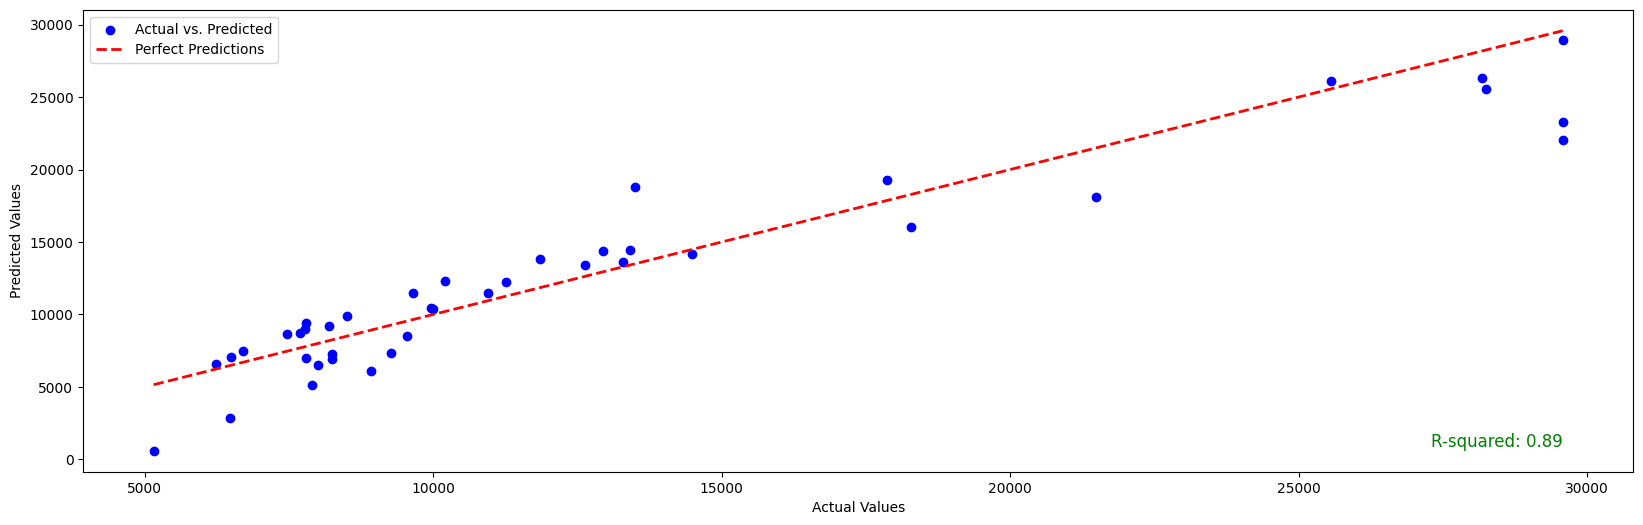

In [ ]:
# Create a scatter plot of the actual data points
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')

# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Predictions')

# Label the axes
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Calculate R-squared
r2_square = r2_score(y_test, y_pred)

# Add R-squared score as text on the plot (bottom-right corner)
plt.text(y_test.max(), y_pred.min(), f'R-squared: {r2_square:.2f}', horizontalalignment='right', verticalalignment='bottom', fontsize=12, color='green')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## Model Interpretation

In [ ]:
# For Linear Regression, you can inspect coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [-1.50437753e+01 -1.46560103e+01 -8.22917466e+02  1.85838782e+03
 -3.10731480e+02 -3.66935102e+02  7.97011216e+02  1.37737716e+04
  2.40346240e+03  2.25413456e+02 -1.05193192e+04  8.68052551e+03
 -2.90168306e+03  4.72689411e+01 -3.27384021e+02 -3.01715351e+04
  2.43823490e+02 -1.23390928e+03  6.38182030e+02  5.52210587e+03
  2.51848334e+04 -6.86964111e+03 -3.03994118e+03  3.47927757e+03
  3.52677154e+00  1.18227864e+01 -8.91786749e+05 -1.32015360e+00
 -9.59926295e-01  8.13740050e+01 -5.80216530e+01  8.35623295e-04
  2.06111332e+00  1.15359329e+03  1.82614237e+02 -4.22133034e+02
 -1.01218346e+00  1.21722893e-03  7.11832937e+00  2.11344910e+00
  6.52026663e+04 -5.27403412e+03  2.45688840e+03  5.48380079e+03
 -7.25465456e+03  6.41008986e+02 -3.81668627e+03  2.58959292e+03
  9.03064907e+03 -5.60366383e+03 -1.96148495e+03]
Intercept: -454968.57619994384


##Observations:

- Linear Regression Model Result:88.9
1. **R-squared (R²):**
   - **High Explained Variance**: An R-squared value of 0.8891 means that the linear regression model explains approximately 88.91% of the variance in the 'price' of cars. This is a strong performance, indicating that a significant portion of the variability in car prices can be accounted for by the features used in the model.

   - **Model Fit**: The model fits the data well, capturing the relationship between the predictor variables (features) and the target variable (car prices).

   - **Predictive Power**: The higher the R-squared value, the better the model is at making predictions based on the available data. In this case, the model is effective in explaining car price variations.

2. **Mean Squared Error (MSE):**
   - **Accuracy of Predictions**: The MSE of 5,873,117.46 is a measure of how close the model's predictions are to the actual prices. A lower MSE is desirable, indicating that, on average, your model's predictions are relatively close to the true prices.

   - **Sensitivity to Outliers**: MSE squares the differences between predicted and actual values, making it sensitive to outliers. In the context of car prices, this means the model might be particularly sensitive to extreme price values or errors.

   - **Practical Significance**: When interpreting the MSE, consider the practical significance of the error. For car prices, a MSE of approximately 5.87 million may or may not be acceptable, depending on the specific business or research context. It's crucial to assess whether the level of error is tolerable for this use case.

Overall, the linear regression model demonstrates strong explanatory power (high R-squared) and generally accurate predictions (relatively low MSE). However, when assessing model performance, it's essential to consider domain-specific requirements and business objectives. Additionally, further analysis, such as examining residual plots, can help you gain a more comprehensive understanding of the model's strengths and limitations.

